In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cross_validation import StratifiedKFold 
import catboost as cb
import matplotlib.pyplot as plt
%matplotlib inline

/home/firehawk/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
TrainDataPath = 'train_HK6lq50.csv'
TestDataPath = 'test_2nAIblo.csv'

# Loading the Training and Test Dataset
TrainData = pd.read_csv(TrainDataPath)
TestData = pd.read_csv(TestDataPath)

In [3]:
print("Training Dataset Shape:")
print(TrainData.shape)
print("\n")
print("Training Dataset Columns/Features:")
print(TrainData.dtypes)
TrainData.head()

Training Dataset Shape:
(73147, 16)


Training Dataset Columns/Features:
id                            object
program_id                    object
program_type                  object
program_duration               int64
test_id                        int64
test_type                     object
difficulty_level              object
trainee_id                     int64
gender                        object
education                     object
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                object
trainee_engagement_rating    float64
is_pass                        int64
dtype: object


,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [4]:
print("Test Dataset Shape:")
print(TestData.shape)
print("\n")
print("Test Dataset Columns/Features:")
print(TestData.dtypes)
TestData.head()

Test Dataset Shape:
(31349, 15)


Test Dataset Columns/Features:
id                            object
program_id                    object
program_type                  object
program_duration               int64
test_id                        int64
test_type                     object
difficulty_level              object
trainee_id                     int64
gender                        object
education                     object
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                object
trainee_engagement_rating    float64
dtype: object


,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,Matriculation,3,46.0,2,N,4.0
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,Bachelors,3,NaN,4,N,4.0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,Matriculation,3,NaN,2,N,3.0
3,7038_72,V_4,V,122,72,offline,vary hard,7038,F,High School Diploma,1,NaN,2,N,2.0
4,888_71,V_4,V,122,71,offline,intermediate,888,F,Matriculation,3,NaN,2,N,2.0


In [5]:
# Now Checking For Any Missing Values# Now Ch 
print("Training Dataset Missing Value Columns:")
print(TrainData.isnull().sum())
print("\n")
print("Test Dataset Missing Value Columns:")
print(TestData.isnull().sum())

Training Dataset Missing Value Columns:
id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          27729
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       77
is_pass                          0
dtype: int64


Test Dataset Missing Value Columns:
id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0

In [6]:
# checking missing data percentage in train data
total = TrainData.isnull().sum().sort_values(ascending = False)
percent = (TrainData.isnull().sum()/TrainData.isnull().count()*100).sort_values(ascending = False)
missing_TrainData  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_TrainData.head(30)

,Total,Percent
age,27729,37.908595
trainee_engagement_rating,77,0.105267
is_pass,0,0.000000
is_handicapped,0,0.000000
total_programs_enrolled,0,0.000000
city_tier,0,0.000000
education,0,0.000000
gender,0,0.000000
trainee_id,0,0.000000
difficulty_level,0,0.000000


In [7]:
# checking missing data percentage in test data
total = TestData.isnull().sum().sort_values(ascending = False)
percent = (TestData.isnull().sum()/TestData.isnull().count()*100).sort_values(ascending = False)
missing_TestData  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_TestData.head(30)

,Total,Percent
age,11791,37.612045
trainee_engagement_rating,31,0.098887
is_handicapped,0,0.000000
total_programs_enrolled,0,0.000000
city_tier,0,0.000000
education,0,0.000000
gender,0,0.000000
trainee_id,0,0.000000
difficulty_level,0,0.000000
test_type,0,0.000000


In [8]:
TrainData["program_id_no"] = TrainData["program_id"].str[2:].astype(int)
TestData["program_id_no"] = TestData["program_id"].str[2:].astype(int)

In [9]:
TrainData.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,program_id_no
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0,1
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1,2
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1,2
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1,3


# VISUALIZATION

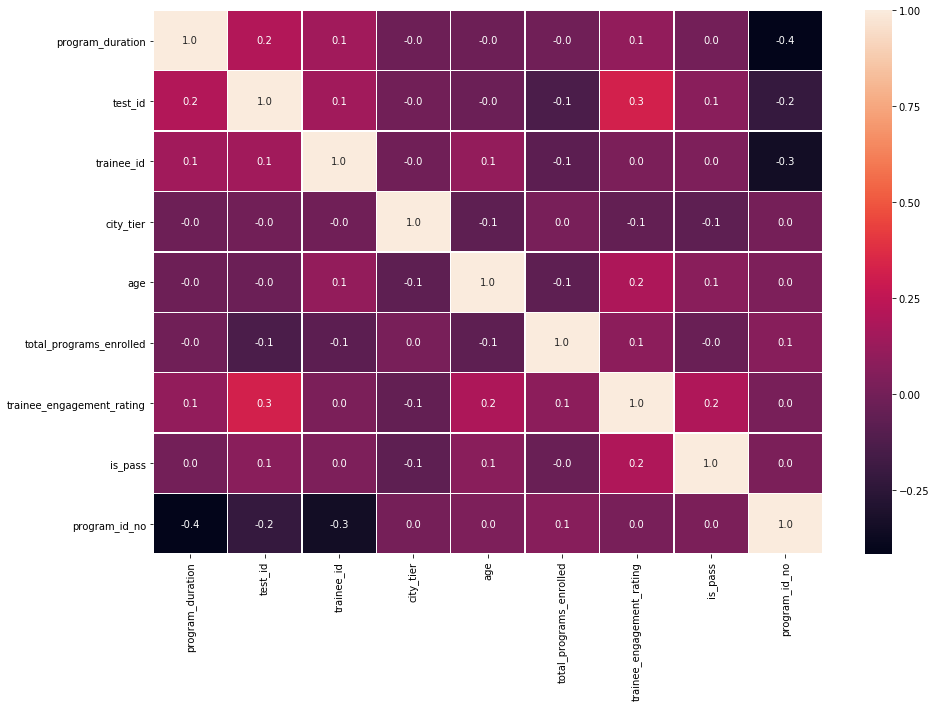

In [10]:
# TRAIN DATA
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(TrainData.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

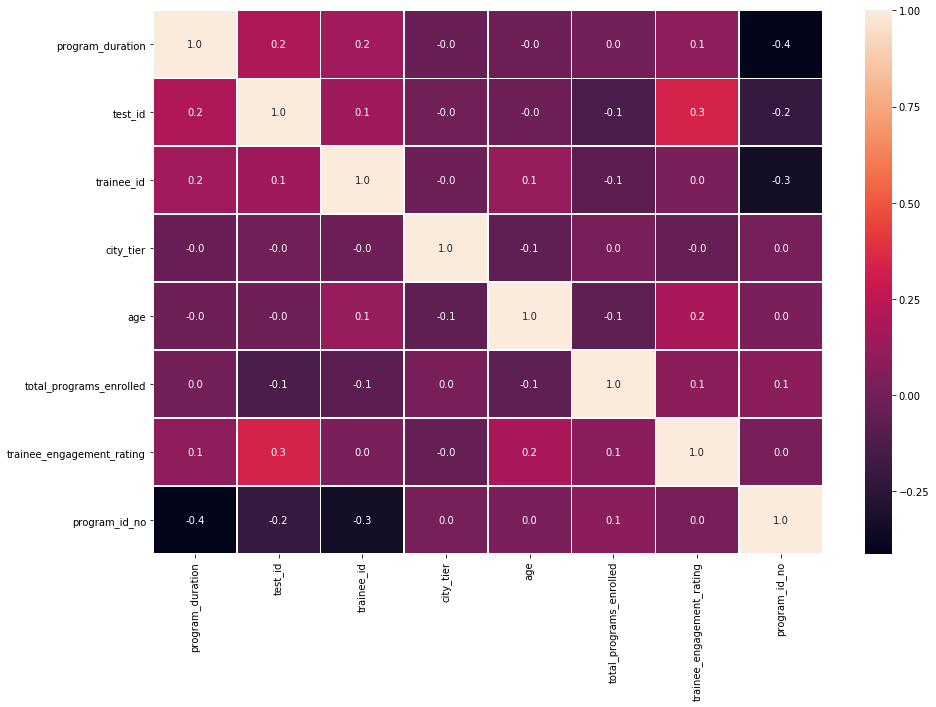

In [11]:
# TEST DATA
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(TestData.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

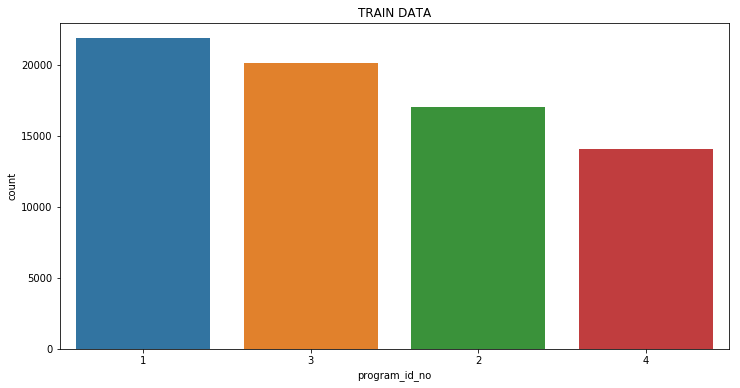

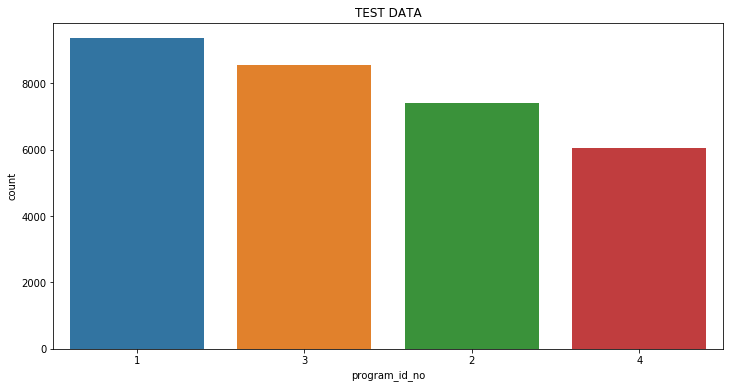

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(TrainData["program_id_no"], order = TrainData["program_id_no"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(TestData["program_id_no"], order = TestData["program_id_no"].value_counts().index)
plt.title('TEST DATA')
plt.show()

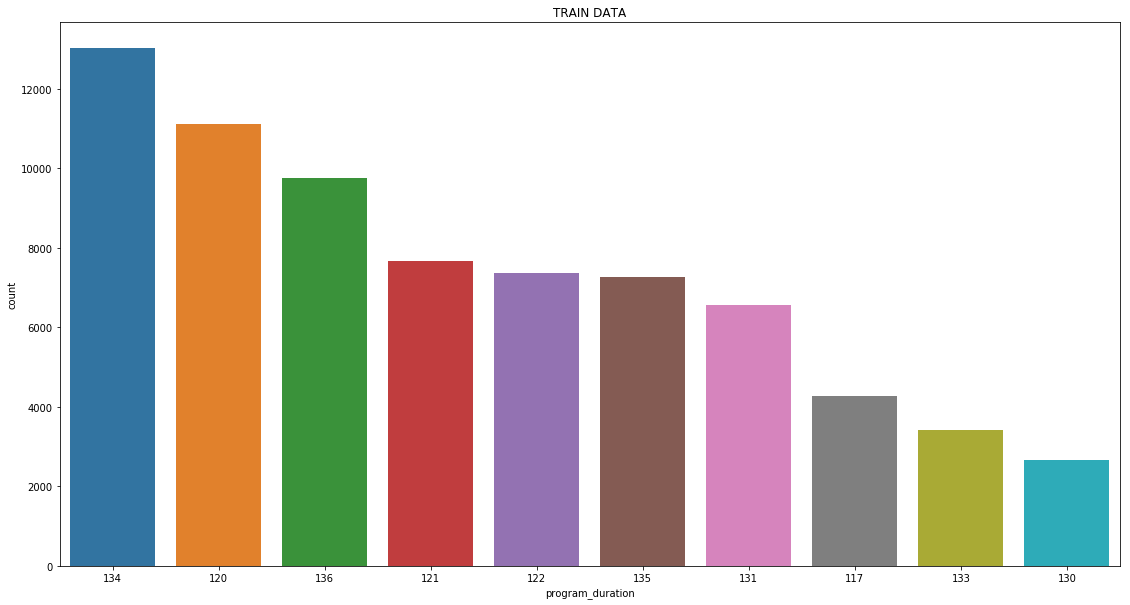

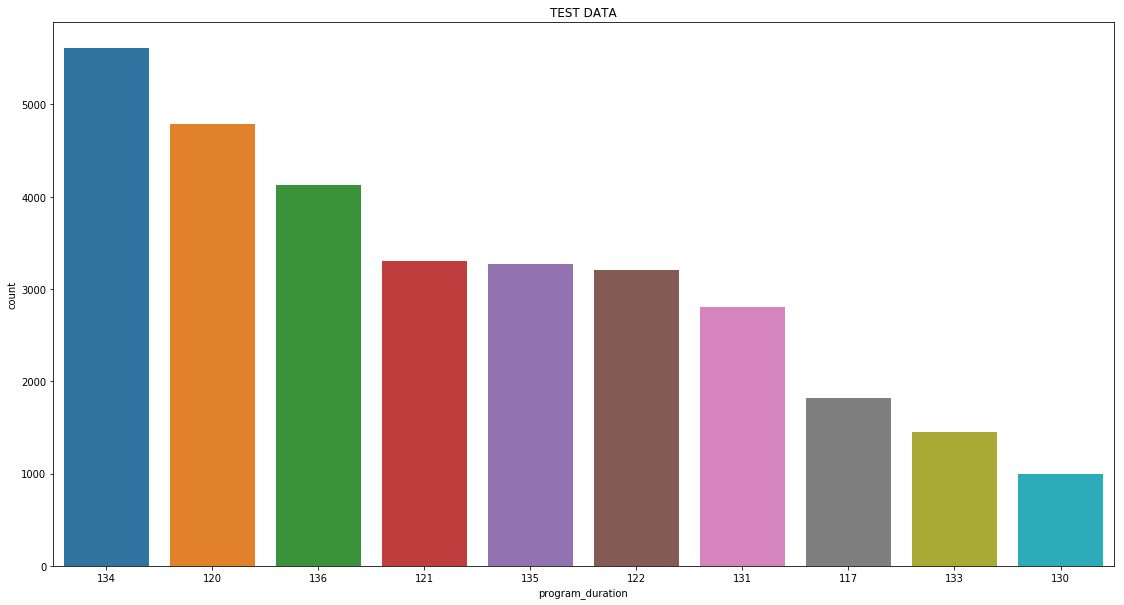

In [13]:
plt.figure(figsize=(19, 10))
sns.countplot(TrainData["program_duration"], order = TrainData["program_duration"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(19, 10))
sns.countplot(TestData["program_duration"], order = TestData["program_duration"].value_counts().index)
plt.title('TEST DATA')
plt.show()

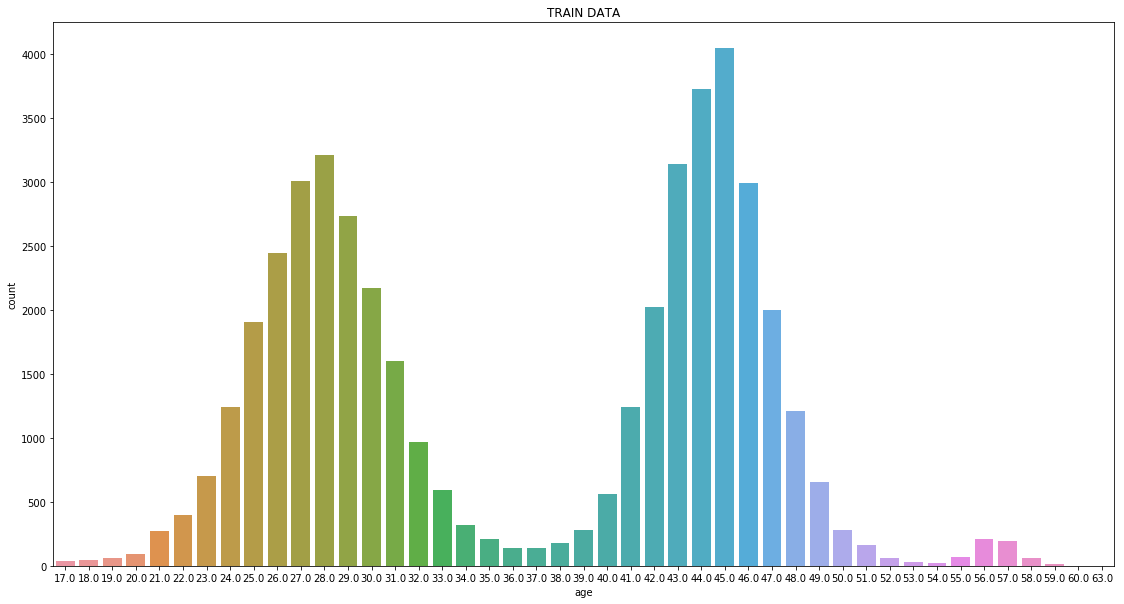

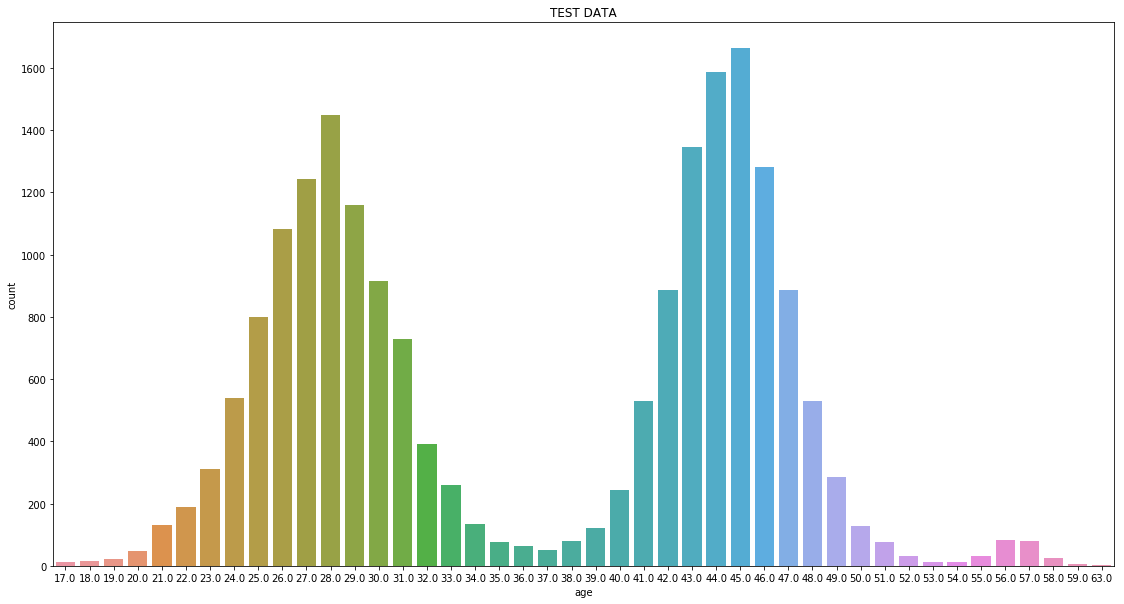

In [14]:
plt.figure(figsize=(19, 10))
sns.countplot(TrainData["age"])
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(19, 10))
sns.countplot(TestData["age"])
plt.title('TEST DATA')
plt.show()

In [15]:
print(TrainData["age"].unique()) #45
print(TestData["age"].unique()) #44

[24. 26. 40. nan 42. 29. 48. 45. 28. 43. 27. 32. 44. 41. 23. 38. 30. 46.
 25. 31. 34. 56. 47. 33. 22. 59. 49. 21. 18. 35. 36. 50. 55. 39. 51. 20.
 19. 54. 58. 57. 37. 52. 53. 17. 63. 60.]
[46. nan 24. 45. 33. 32. 44. 41. 48. 29. 30. 31. 43. 28. 47. 27. 26. 42.
 35. 25. 40. 38. 34. 57. 21. 37. 23. 50. 36. 52. 49. 54. 39. 22. 20. 55.
 19. 51. 53. 56. 59. 17. 58. 18. 63.]


In [16]:
TrainData["age"].nunique() == TestData["age"].nunique()

False

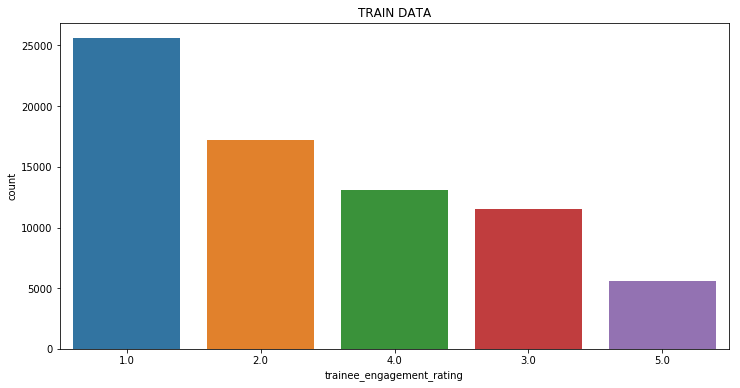

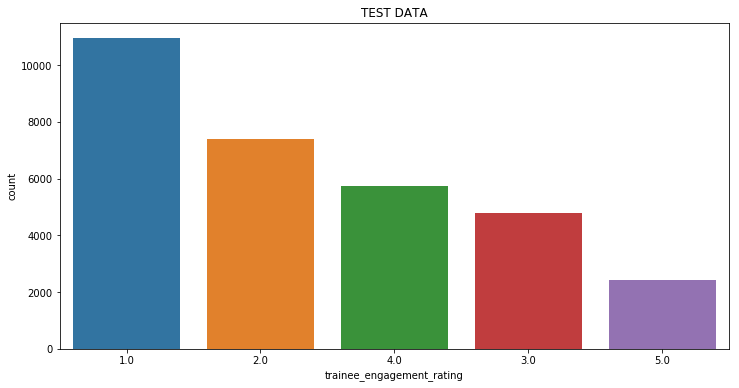

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(TrainData["trainee_engagement_rating"], order = TrainData["trainee_engagement_rating"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(TestData["trainee_engagement_rating"], order = TestData["trainee_engagement_rating"].value_counts().index)
plt.title('TEST DATA')
plt.show()

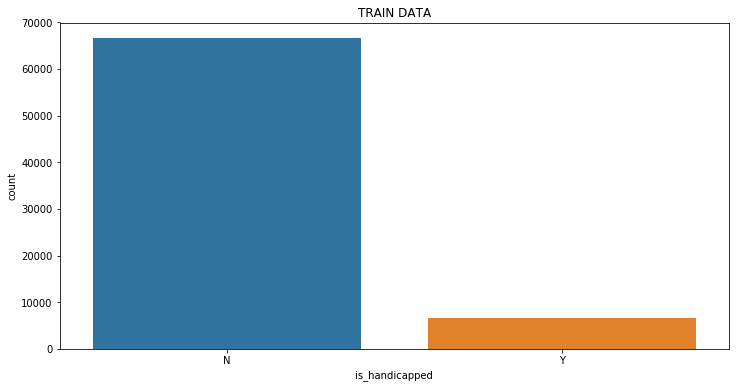

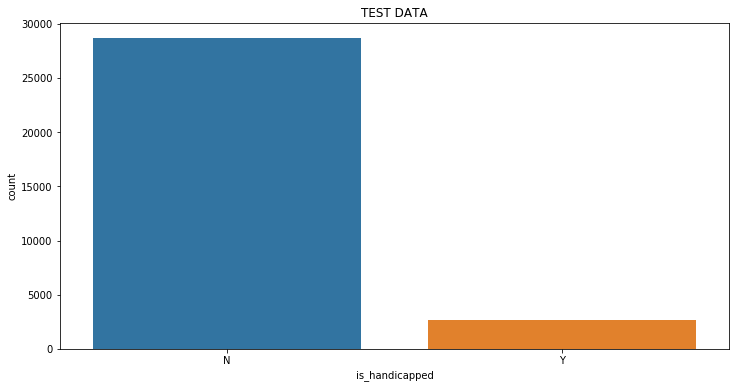

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(TrainData["is_handicapped"], order = TrainData["is_handicapped"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(TestData["is_handicapped"], order = TestData["is_handicapped"].value_counts().index)
plt.title('TEST DATA')
plt.show()

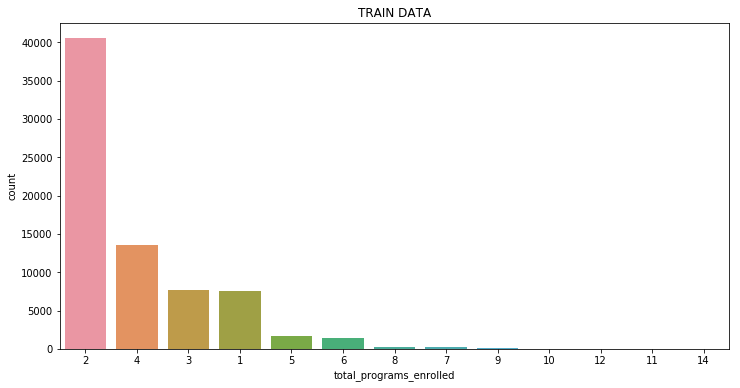

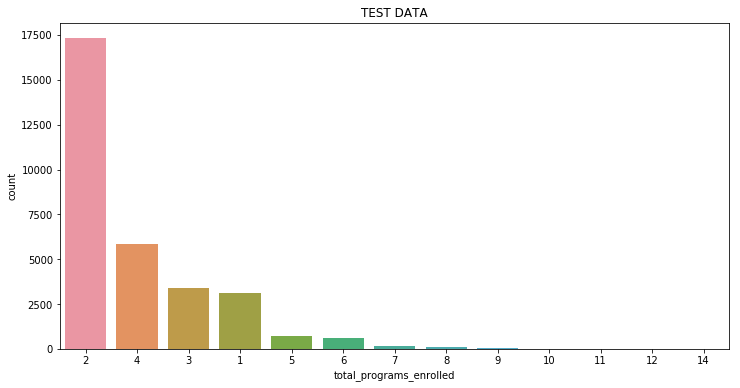

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(TrainData["total_programs_enrolled"], order = TrainData["total_programs_enrolled"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(TestData["total_programs_enrolled"], order = TestData["total_programs_enrolled"].value_counts().index)
plt.title('TEST DATA')
plt.show()

In [20]:
print(TrainData["total_programs_enrolled"].unique()) #13
print(TestData["total_programs_enrolled"].unique()) #13

[ 5  2  1  4  3  6  7 10 14  8 11  9 12]
[ 2  4  1  3  5  6  7  8 11  9 12 14 10]


In [21]:
TrainData["total_programs_enrolled"].nunique() == TestData["total_programs_enrolled"].nunique()

True

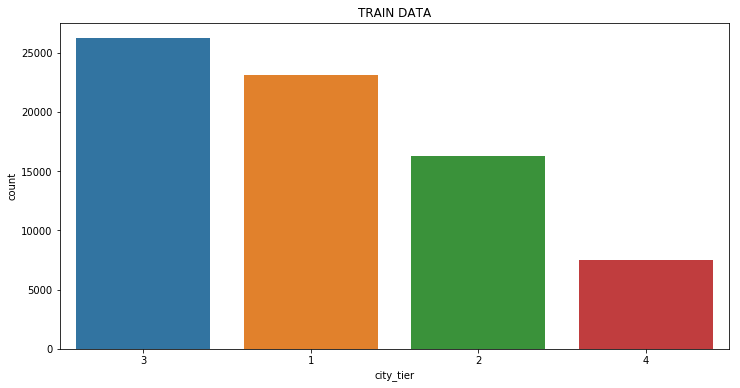

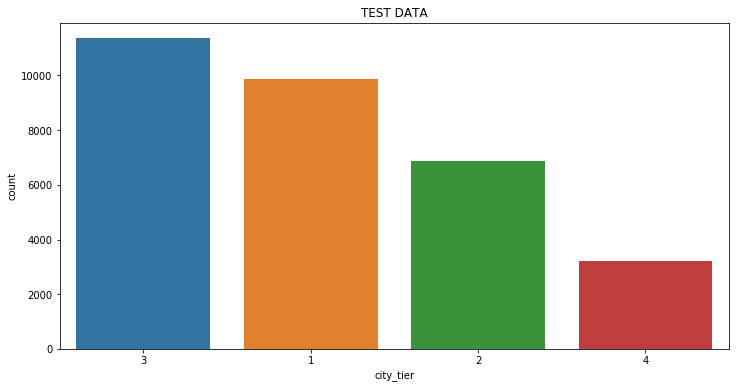

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(TrainData["city_tier"], order = TrainData["city_tier"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(TestData["city_tier"], order = TestData["city_tier"].value_counts().index)
plt.title('TEST DATA')
plt.show()

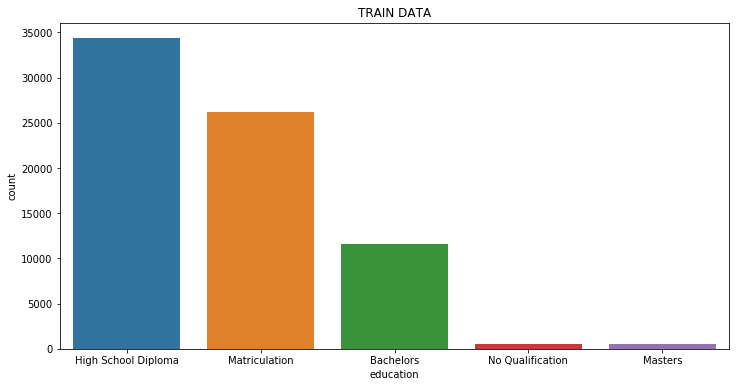

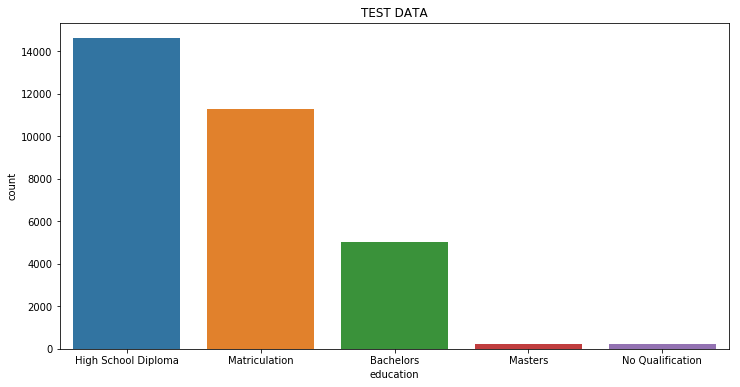

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(TrainData["education"], order = TrainData["education"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(TestData["education"], order = TestData["education"].value_counts().index)
plt.title('TEST DATA')
plt.show()

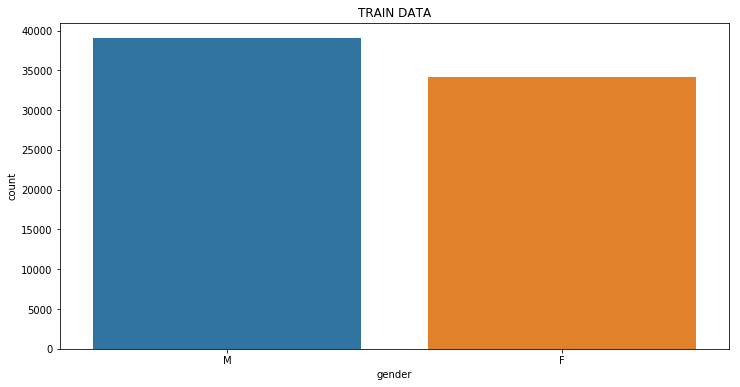

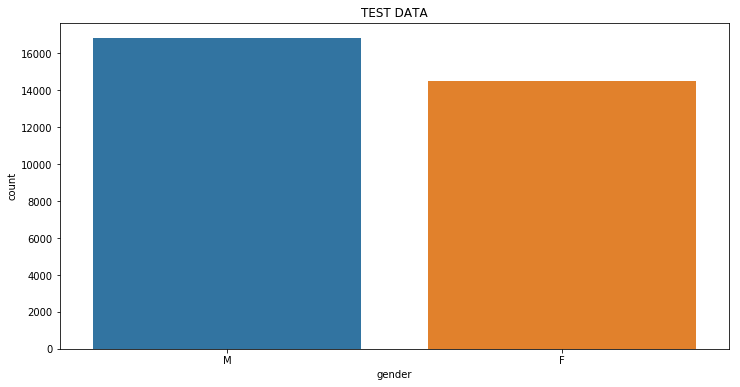

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(TrainData["gender"], order = TrainData["gender"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(TestData["gender"], order = TestData["gender"].value_counts().index)
plt.title('TEST DATA')
plt.show()

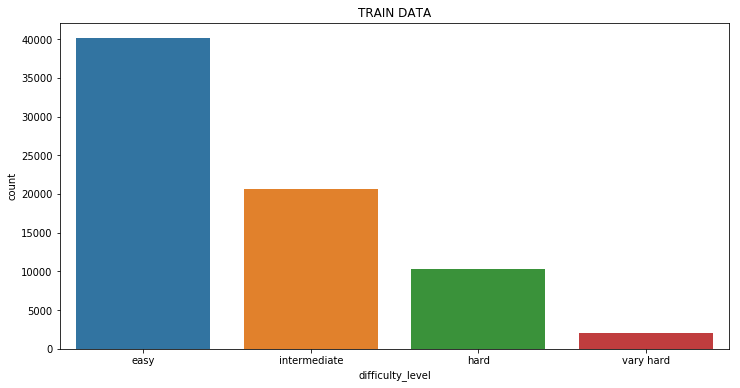

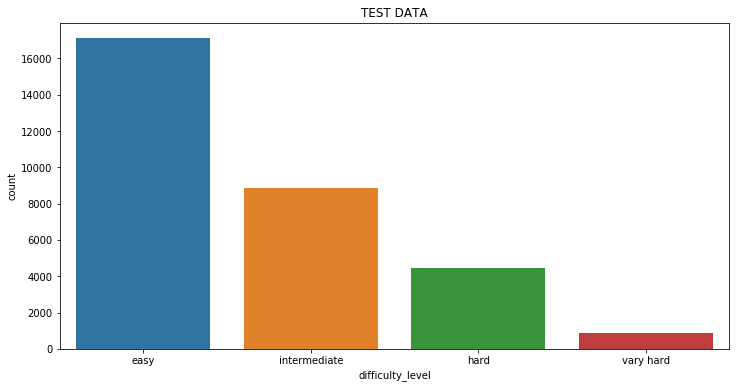

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(TrainData["difficulty_level"], order = TrainData["difficulty_level"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(TestData["difficulty_level"], order = TestData["difficulty_level"].value_counts().index)
plt.title('TEST DATA')
plt.show()

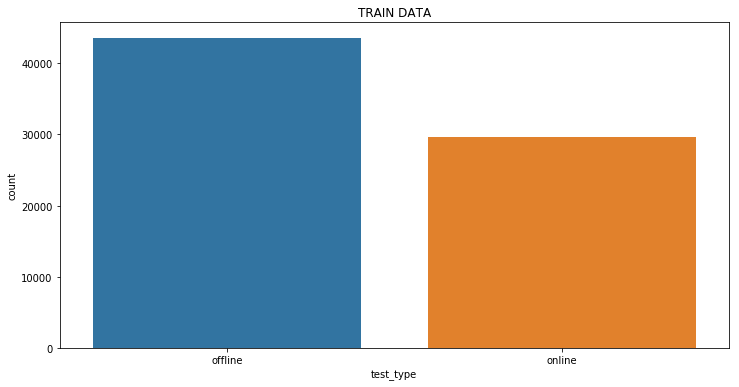

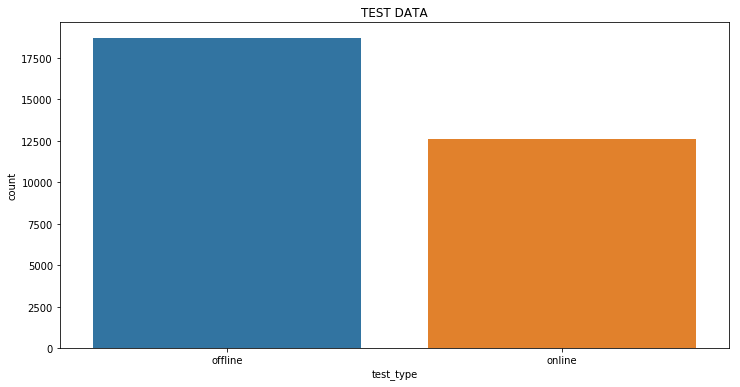

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(TrainData["test_type"], order = TrainData["test_type"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(TestData["test_type"], order = TestData["test_type"].value_counts().index)
plt.title('TEST DATA')
plt.show()

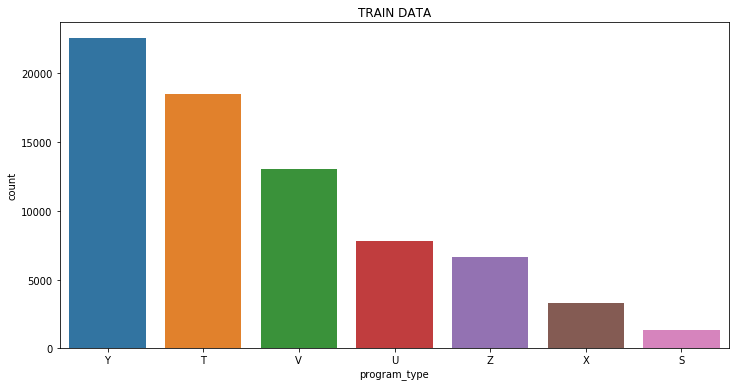

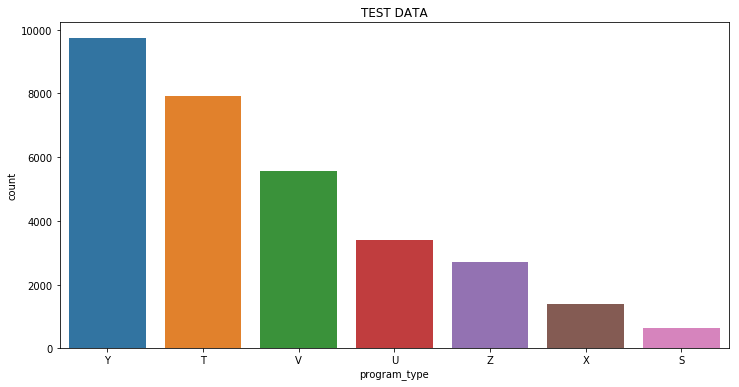

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(TrainData["program_type"], order = TrainData["program_type"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(TestData["program_type"], order = TestData["program_type"].value_counts().index)
plt.title('TEST DATA')
plt.show()

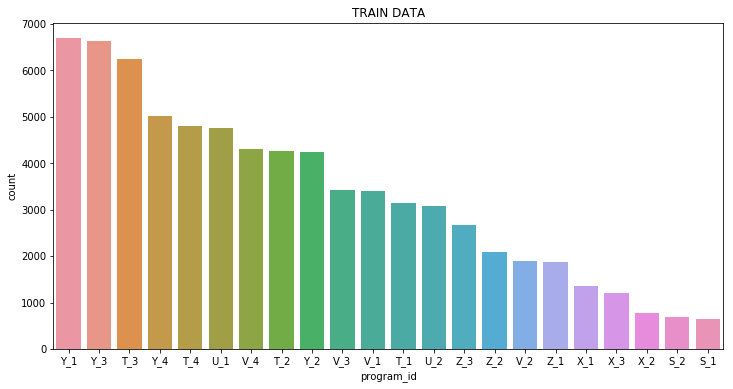

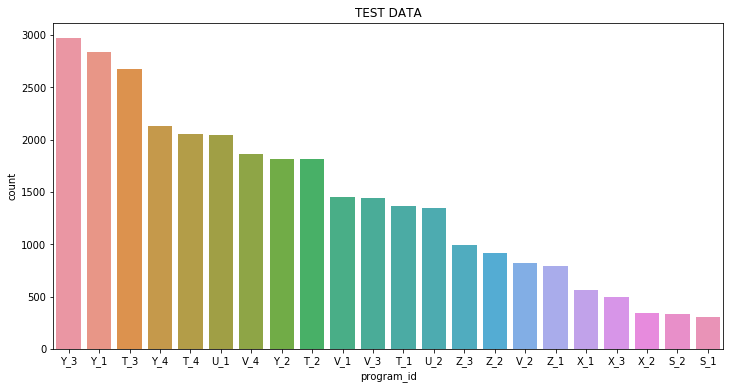

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(TrainData["program_id"], order = TrainData["program_id"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(TestData["program_id"], order = TestData["program_id"].value_counts().index)
plt.title('TEST DATA')
plt.show()

In [29]:
print(TrainData["program_id"].unique()) #22
print(TestData["program_id"].unique()) #22

['Y_1' 'T_1' 'Z_2' 'T_2' 'V_3' 'T_3' 'Y_2' 'U_1' 'Y_3' 'X_3' 'Y_4' 'V_1'
 'T_4' 'Z_1' 'S_2' 'X_2' 'V_4' 'Z_3' 'U_2' 'X_1' 'S_1' 'V_2']
['T_1' 'Y_3' 'Y_2' 'V_4' 'U_1' 'T_3' 'V_1' 'T_4' 'Y_4' 'Z_2' 'Y_1' 'U_2'
 'T_2' 'V_2' 'X_1' 'V_3' 'X_3' 'Z_3' 'S_1' 'Z_1' 'S_2' 'X_2']


In [30]:
TrainData["program_id"].nunique() == TestData["program_id"].nunique()

True

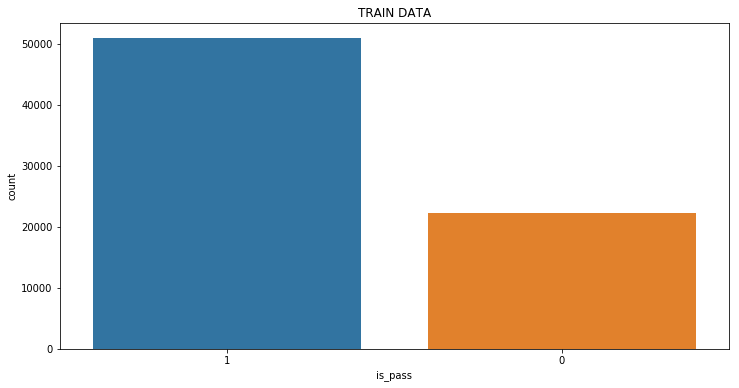

In [31]:
# TRAIN DATA OUTPUT / TARGET COLUMN
plt.figure(figsize=(12, 6))
sns.countplot(TrainData["is_pass"], order = TrainData["is_pass"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

# MODEL

In [32]:
TrainData.head(1)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,program_id_no
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0,1


## Feature Engineering

In [33]:
TrainData["age_miss"] = TrainData["age"].isnull()
TrainData["age_miss"] = TrainData["age_miss"]*1

TestData["age_miss"] = TestData["age"].isnull()
TestData["age_miss"] = TestData["age_miss"]*1

In [34]:
TrainData["educated"] = TrainData["education"] != "No Qualification"
TrainData["educated"] = TrainData["educated"]*1

TestData["educated"] = TestData["education"] != "No Qualification"
TestData["educated"] = TestData["educated"]*1

In [35]:
Train = TrainData.copy()
Test = TestData.copy()

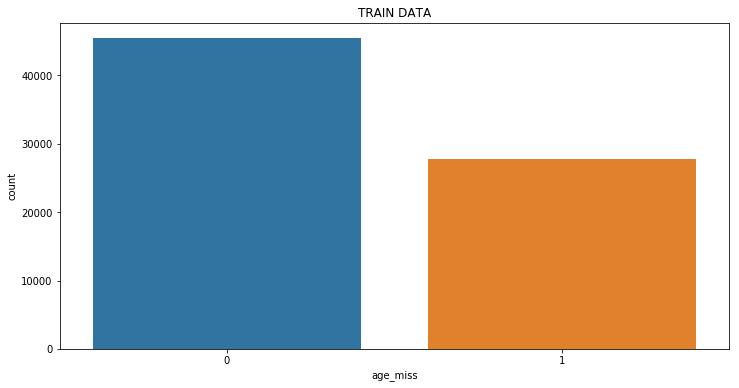

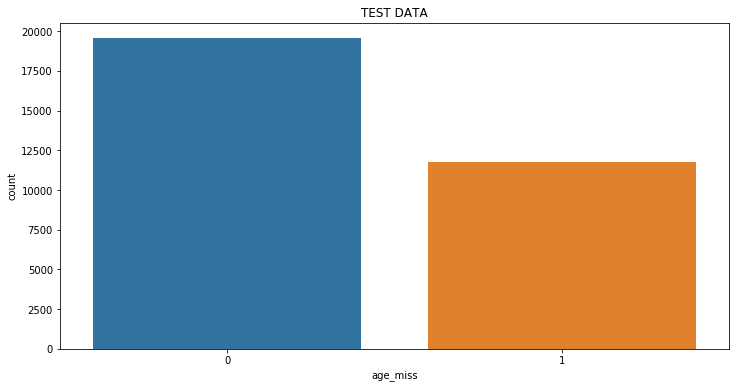

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(Train["age_miss"], order = Train["age_miss"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(Test["age_miss"], order = Test["age_miss"].value_counts().index)
plt.title('TEST DATA')
plt.show()

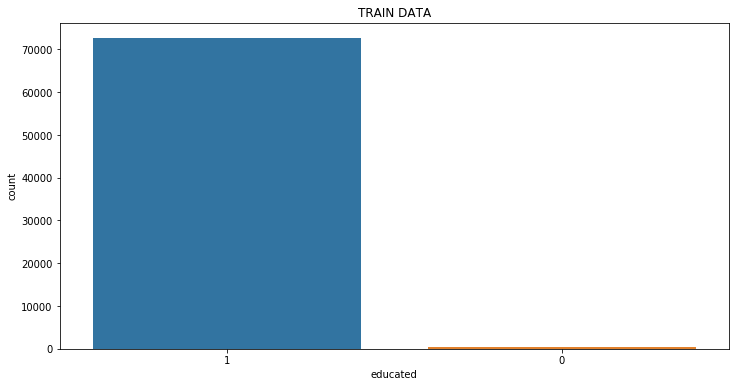

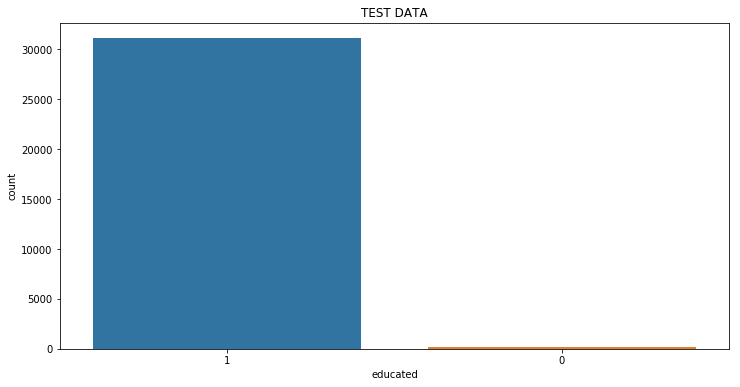

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(Train["educated"], order = Train["educated"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(Test["educated"], order = Test["educated"].value_counts().index)
plt.title('TEST DATA')
plt.show()

# Filling Missing Values

In [38]:
Train['trainee_engagement_rating'].fillna(-1.0,inplace=True)
Test['trainee_engagement_rating'].fillna(-1.0,inplace=True)

Train['age'].fillna(Train['age'].median(),inplace=True)
Test['age'].fillna(Test['age'].median(),inplace=True)

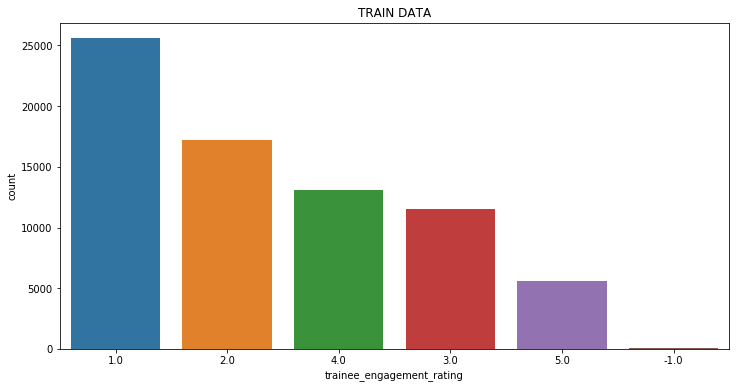

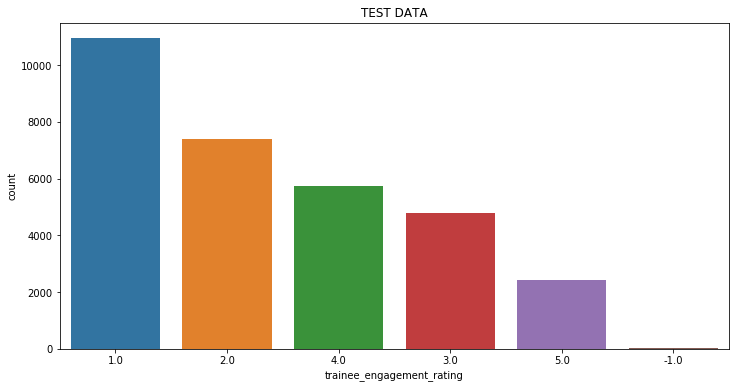

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(Train["trainee_engagement_rating"], order = Train["trainee_engagement_rating"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(Test["trainee_engagement_rating"], order = Test["trainee_engagement_rating"].value_counts().index)
plt.title('TEST DATA')
plt.show()

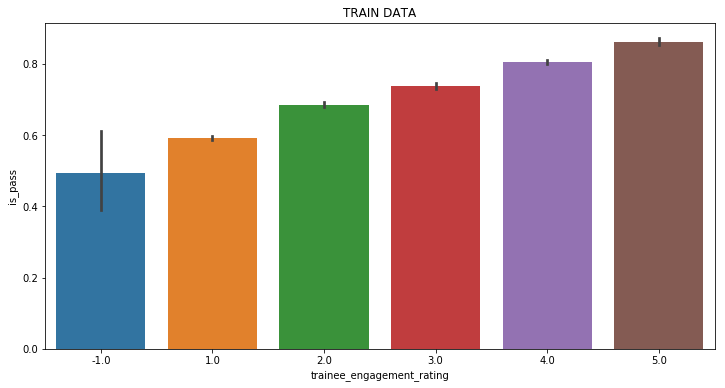

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(Train["trainee_engagement_rating"], Train['is_pass'])
plt.title('TRAIN DATA')
plt.show()

In [46]:
X_Train = Train.drop(['is_pass'], axis=1)
y_Train = Train['is_pass']
feat_categ = list(np.where(X_Train.dtypes != np.float)[0])

X_Test = Test

In [47]:
# Parameters for catboost manually tuned
num_inter = [200, 400, 500, 600, 700, 800, 1000]
Depth = [4, 5, 6, 7, 8, 10]
alpha = [0.001, 0.01, 0.03, 0.1, 0.3]

In [51]:
# Using Catboost model for predictions
classifier = cb.CatBoostClassifier(iterations=num_inter[4], depth=Depth[2], learning_rate=alpha[3])

X_TR = X_Train.values
Y_TR = y_Train.values
cv = StratifiedKFold(Y_TR, n_folds=10)
for train_index, test_index in cv:
    X_tr, y_tr = X_TR[train_index], Y_TR[train_index]
    X_te, y_te = X_TR[test_index], Y_TR[test_index]
    classifier.fit(X_tr, y_tr, cat_features=feat_categ, eval_set=(X_te, y_te),plot=False)
    

0:	learn: 0.6635320	test: 0.6639061	best: 0.6639061 (0)	total: 164ms	remaining: 1m 54s
1:	learn: 0.6326101	test: 0.6286379	best: 0.6286379 (1)	total: 351ms	remaining: 2m 2s
2:	learn: 0.6076321	test: 0.5998582	best: 0.5998582 (2)	total: 542ms	remaining: 2m 5s
3:	learn: 0.5873586	test: 0.5755889	best: 0.5755889 (3)	total: 661ms	remaining: 1m 55s
4:	learn: 0.5717011	test: 0.5578578	best: 0.5578578 (4)	total: 757ms	remaining: 1m 45s
5:	learn: 0.5592542	test: 0.5431141	best: 0.5431141 (5)	total: 866ms	remaining: 1m 40s
6:	learn: 0.5492504	test: 0.5316386	best: 0.5316386 (6)	total: 1.04s	remaining: 1m 42s
7:	learn: 0.5411254	test: 0.5218863	best: 0.5218863 (7)	total: 1.15s	remaining: 1m 39s
8:	learn: 0.5343346	test: 0.5141936	best: 0.5141936 (8)	total: 1.32s	remaining: 1m 41s
9:	learn: 0.5291655	test: 0.5075678	best: 0.5075678 (9)	total: 1.43s	remaining: 1m 38s
10:	learn: 0.5247965	test: 0.5025417	best: 0.5025417 (10)	total: 1.63s	remaining: 1m 42s
11:	learn: 0.5210536	test: 0.4981753	best: 

94:	learn: 0.4821698	test: 0.4603257	best: 0.4603175 (93)	total: 22.1s	remaining: 2m 20s
95:	learn: 0.4820411	test: 0.4602062	best: 0.4602062 (95)	total: 22.2s	remaining: 2m 19s
96:	learn: 0.4819815	test: 0.4602052	best: 0.4602052 (96)	total: 22.4s	remaining: 2m 19s
97:	learn: 0.4819273	test: 0.4602153	best: 0.4602052 (96)	total: 22.6s	remaining: 2m 18s
98:	learn: 0.4817492	test: 0.4600977	best: 0.4600977 (98)	total: 22.8s	remaining: 2m 18s
99:	learn: 0.4816799	test: 0.4600941	best: 0.4600941 (99)	total: 23s	remaining: 2m 17s
100:	learn: 0.4816396	test: 0.4601336	best: 0.4600941 (99)	total: 23.1s	remaining: 2m 17s
101:	learn: 0.4815590	test: 0.4599792	best: 0.4599792 (101)	total: 23.3s	remaining: 2m 16s
102:	learn: 0.4814960	test: 0.4599828	best: 0.4599792 (101)	total: 23.5s	remaining: 2m 16s
103:	learn: 0.4813949	test: 0.4599655	best: 0.4599655 (103)	total: 23.8s	remaining: 2m 16s
104:	learn: 0.4813320	test: 0.4599904	best: 0.4599655 (103)	total: 23.9s	remaining: 2m 15s
105:	learn: 0.

185:	learn: 0.4743406	test: 0.4569404	best: 0.4569183 (184)	total: 42.9s	remaining: 1m 58s
186:	learn: 0.4742026	test: 0.4568494	best: 0.4568494 (186)	total: 43.1s	remaining: 1m 58s
187:	learn: 0.4741636	test: 0.4568367	best: 0.4568367 (187)	total: 43.4s	remaining: 1m 58s
188:	learn: 0.4741021	test: 0.4568417	best: 0.4568367 (187)	total: 43.6s	remaining: 1m 57s
189:	learn: 0.4740298	test: 0.4568275	best: 0.4568275 (189)	total: 43.8s	remaining: 1m 57s
190:	learn: 0.4739779	test: 0.4567948	best: 0.4567948 (190)	total: 44.1s	remaining: 1m 57s
191:	learn: 0.4739366	test: 0.4567993	best: 0.4567948 (190)	total: 44.2s	remaining: 1m 57s
192:	learn: 0.4738651	test: 0.4567474	best: 0.4567474 (192)	total: 44.4s	remaining: 1m 56s
193:	learn: 0.4738408	test: 0.4567674	best: 0.4567474 (192)	total: 44.6s	remaining: 1m 56s
194:	learn: 0.4737879	test: 0.4567860	best: 0.4567474 (192)	total: 44.8s	remaining: 1m 56s
195:	learn: 0.4736957	test: 0.4567820	best: 0.4567474 (192)	total: 45s	remaining: 1m 55s
1

276:	learn: 0.4689501	test: 0.4560747	best: 0.4560733 (273)	total: 1m 5s	remaining: 1m 39s
277:	learn: 0.4688496	test: 0.4560163	best: 0.4560163 (277)	total: 1m 5s	remaining: 1m 39s
278:	learn: 0.4688048	test: 0.4560101	best: 0.4560101 (278)	total: 1m 5s	remaining: 1m 39s
279:	learn: 0.4687059	test: 0.4559938	best: 0.4559938 (279)	total: 1m 6s	remaining: 1m 39s
280:	learn: 0.4686399	test: 0.4560069	best: 0.4559938 (279)	total: 1m 6s	remaining: 1m 39s
281:	learn: 0.4685608	test: 0.4559657	best: 0.4559657 (281)	total: 1m 7s	remaining: 1m 39s
282:	learn: 0.4684858	test: 0.4559424	best: 0.4559424 (282)	total: 1m 7s	remaining: 1m 39s
283:	learn: 0.4684266	test: 0.4559568	best: 0.4559424 (282)	total: 1m 7s	remaining: 1m 39s
284:	learn: 0.4683014	test: 0.4559058	best: 0.4559058 (284)	total: 1m 8s	remaining: 1m 39s
285:	learn: 0.4682040	test: 0.4558801	best: 0.4558801 (285)	total: 1m 8s	remaining: 1m 38s
286:	learn: 0.4681287	test: 0.4558655	best: 0.4558655 (286)	total: 1m 8s	remaining: 1m 38s

366:	learn: 0.4634989	test: 0.4555036	best: 0.4555036 (366)	total: 1m 27s	remaining: 1m 18s
367:	learn: 0.4634265	test: 0.4555205	best: 0.4555036 (366)	total: 1m 27s	remaining: 1m 18s
368:	learn: 0.4633621	test: 0.4555186	best: 0.4555036 (366)	total: 1m 27s	remaining: 1m 18s
369:	learn: 0.4633099	test: 0.4555308	best: 0.4555036 (366)	total: 1m 27s	remaining: 1m 18s
370:	learn: 0.4632721	test: 0.4555279	best: 0.4555036 (366)	total: 1m 27s	remaining: 1m 18s
371:	learn: 0.4631786	test: 0.4555022	best: 0.4555022 (371)	total: 1m 28s	remaining: 1m 17s
372:	learn: 0.4631247	test: 0.4555167	best: 0.4555022 (371)	total: 1m 28s	remaining: 1m 17s
373:	learn: 0.4630646	test: 0.4555102	best: 0.4555022 (371)	total: 1m 28s	remaining: 1m 17s
374:	learn: 0.4630200	test: 0.4555013	best: 0.4555013 (374)	total: 1m 29s	remaining: 1m 17s
375:	learn: 0.4629848	test: 0.4555133	best: 0.4555013 (374)	total: 1m 29s	remaining: 1m 16s
376:	learn: 0.4629613	test: 0.4555227	best: 0.4555013 (374)	total: 1m 29s	remain

456:	learn: 0.4582576	test: 0.4554217	best: 0.4553821 (445)	total: 1m 48s	remaining: 57.7s
457:	learn: 0.4582292	test: 0.4554309	best: 0.4553821 (445)	total: 1m 48s	remaining: 57.4s
458:	learn: 0.4581248	test: 0.4554728	best: 0.4553821 (445)	total: 1m 48s	remaining: 57.1s
459:	learn: 0.4580742	test: 0.4554861	best: 0.4553821 (445)	total: 1m 49s	remaining: 56.9s
460:	learn: 0.4580440	test: 0.4554839	best: 0.4553821 (445)	total: 1m 49s	remaining: 56.7s
461:	learn: 0.4579919	test: 0.4555191	best: 0.4553821 (445)	total: 1m 49s	remaining: 56.4s
462:	learn: 0.4579374	test: 0.4554833	best: 0.4553821 (445)	total: 1m 49s	remaining: 56.1s
463:	learn: 0.4578556	test: 0.4555398	best: 0.4553821 (445)	total: 1m 49s	remaining: 55.8s
464:	learn: 0.4578108	test: 0.4555188	best: 0.4553821 (445)	total: 1m 49s	remaining: 55.6s
465:	learn: 0.4577604	test: 0.4554854	best: 0.4553821 (445)	total: 1m 50s	remaining: 55.3s
466:	learn: 0.4577172	test: 0.4554749	best: 0.4553821 (445)	total: 1m 50s	remaining: 55.1s

547:	learn: 0.4537055	test: 0.4553417	best: 0.4552770 (531)	total: 2m 8s	remaining: 35.6s
548:	learn: 0.4536292	test: 0.4553470	best: 0.4552770 (531)	total: 2m 8s	remaining: 35.4s
549:	learn: 0.4536133	test: 0.4553319	best: 0.4552770 (531)	total: 2m 8s	remaining: 35.2s
550:	learn: 0.4535903	test: 0.4553480	best: 0.4552770 (531)	total: 2m 9s	remaining: 34.9s
551:	learn: 0.4535524	test: 0.4553686	best: 0.4552770 (531)	total: 2m 9s	remaining: 34.7s
552:	learn: 0.4534952	test: 0.4553400	best: 0.4552770 (531)	total: 2m 9s	remaining: 34.5s
553:	learn: 0.4534260	test: 0.4553988	best: 0.4552770 (531)	total: 2m 9s	remaining: 34.2s
554:	learn: 0.4533692	test: 0.4554257	best: 0.4552770 (531)	total: 2m 10s	remaining: 34s
555:	learn: 0.4533477	test: 0.4554350	best: 0.4552770 (531)	total: 2m 10s	remaining: 33.7s
556:	learn: 0.4533287	test: 0.4554490	best: 0.4552770 (531)	total: 2m 10s	remaining: 33.5s
557:	learn: 0.4532524	test: 0.4554670	best: 0.4552770 (531)	total: 2m 10s	remaining: 33.3s
558:	lea

638:	learn: 0.4491024	test: 0.4552953	best: 0.4552255 (617)	total: 2m 27s	remaining: 14.1s
639:	learn: 0.4490729	test: 0.4552944	best: 0.4552255 (617)	total: 2m 27s	remaining: 13.9s
640:	learn: 0.4490252	test: 0.4553431	best: 0.4552255 (617)	total: 2m 27s	remaining: 13.6s
641:	learn: 0.4489804	test: 0.4553592	best: 0.4552255 (617)	total: 2m 28s	remaining: 13.4s
642:	learn: 0.4489639	test: 0.4553300	best: 0.4552255 (617)	total: 2m 28s	remaining: 13.2s
643:	learn: 0.4489052	test: 0.4553282	best: 0.4552255 (617)	total: 2m 28s	remaining: 12.9s
644:	learn: 0.4488677	test: 0.4553545	best: 0.4552255 (617)	total: 2m 28s	remaining: 12.7s
645:	learn: 0.4488330	test: 0.4553532	best: 0.4552255 (617)	total: 2m 29s	remaining: 12.5s
646:	learn: 0.4487749	test: 0.4553658	best: 0.4552255 (617)	total: 2m 29s	remaining: 12.2s
647:	learn: 0.4487113	test: 0.4553941	best: 0.4552255 (617)	total: 2m 29s	remaining: 12s
648:	learn: 0.4486779	test: 0.4554008	best: 0.4552255 (617)	total: 2m 30s	remaining: 11.8s
6

30:	learn: 0.4975993	test: 0.4670150	best: 0.4670150 (30)	total: 7.08s	remaining: 2m 32s
31:	learn: 0.4972478	test: 0.4666351	best: 0.4666351 (31)	total: 7.24s	remaining: 2m 31s
32:	learn: 0.4967905	test: 0.4659958	best: 0.4659958 (32)	total: 7.42s	remaining: 2m 30s
33:	learn: 0.4964358	test: 0.4655558	best: 0.4655558 (33)	total: 7.66s	remaining: 2m 30s
34:	learn: 0.4958646	test: 0.4650516	best: 0.4650516 (34)	total: 7.95s	remaining: 2m 31s
35:	learn: 0.4954914	test: 0.4647656	best: 0.4647656 (35)	total: 8.14s	remaining: 2m 30s
36:	learn: 0.4952576	test: 0.4645773	best: 0.4645773 (36)	total: 8.45s	remaining: 2m 31s
37:	learn: 0.4948850	test: 0.4641485	best: 0.4641485 (37)	total: 8.73s	remaining: 2m 32s
38:	learn: 0.4946022	test: 0.4640173	best: 0.4640173 (38)	total: 9.1s	remaining: 2m 34s
39:	learn: 0.4942361	test: 0.4634065	best: 0.4634065 (39)	total: 9.44s	remaining: 2m 35s
40:	learn: 0.4938638	test: 0.4631308	best: 0.4631308 (40)	total: 9.85s	remaining: 2m 38s
41:	learn: 0.4936454	t

122:	learn: 0.4818367	test: 0.4538050	best: 0.4538050 (122)	total: 34.2s	remaining: 2m 40s
123:	learn: 0.4817383	test: 0.4537083	best: 0.4537083 (123)	total: 34.5s	remaining: 2m 40s
124:	learn: 0.4816209	test: 0.4536026	best: 0.4536026 (124)	total: 34.8s	remaining: 2m 40s
125:	learn: 0.4815117	test: 0.4535900	best: 0.4535900 (125)	total: 35.1s	remaining: 2m 39s
126:	learn: 0.4814092	test: 0.4535464	best: 0.4535464 (126)	total: 35.4s	remaining: 2m 39s
127:	learn: 0.4812426	test: 0.4534276	best: 0.4534276 (127)	total: 35.6s	remaining: 2m 39s
128:	learn: 0.4811866	test: 0.4534309	best: 0.4534276 (127)	total: 35.9s	remaining: 2m 39s
129:	learn: 0.4811329	test: 0.4534284	best: 0.4534276 (127)	total: 36.2s	remaining: 2m 38s
130:	learn: 0.4810589	test: 0.4534634	best: 0.4534276 (127)	total: 36.6s	remaining: 2m 38s
131:	learn: 0.4810373	test: 0.4534544	best: 0.4534276 (127)	total: 36.8s	remaining: 2m 38s
132:	learn: 0.4809644	test: 0.4534692	best: 0.4534276 (127)	total: 37.1s	remaining: 2m 38s

213:	learn: 0.4752332	test: 0.4514780	best: 0.4514461 (199)	total: 59.9s	remaining: 2m 16s
214:	learn: 0.4751259	test: 0.4514488	best: 0.4514461 (199)	total: 1m	remaining: 2m 15s
215:	learn: 0.4750813	test: 0.4514304	best: 0.4514304 (215)	total: 1m	remaining: 2m 15s
216:	learn: 0.4750371	test: 0.4514312	best: 0.4514304 (215)	total: 1m	remaining: 2m 15s
217:	learn: 0.4749792	test: 0.4514096	best: 0.4514096 (217)	total: 1m 1s	remaining: 2m 15s
218:	learn: 0.4749381	test: 0.4513962	best: 0.4513962 (218)	total: 1m 1s	remaining: 2m 14s
219:	learn: 0.4748960	test: 0.4514011	best: 0.4513962 (218)	total: 1m 1s	remaining: 2m 14s
220:	learn: 0.4748334	test: 0.4513519	best: 0.4513519 (220)	total: 1m 1s	remaining: 2m 14s
221:	learn: 0.4747754	test: 0.4513679	best: 0.4513519 (220)	total: 1m 2s	remaining: 2m 13s
222:	learn: 0.4747080	test: 0.4513301	best: 0.4513301 (222)	total: 1m 2s	remaining: 2m 13s
223:	learn: 0.4746161	test: 0.4512489	best: 0.4512489 (223)	total: 1m 2s	remaining: 2m 13s
224:	lea

304:	learn: 0.4694566	test: 0.4506696	best: 0.4506696 (304)	total: 1m 26s	remaining: 1m 51s
305:	learn: 0.4693871	test: 0.4506965	best: 0.4506696 (304)	total: 1m 26s	remaining: 1m 51s
306:	learn: 0.4692608	test: 0.4506306	best: 0.4506306 (306)	total: 1m 26s	remaining: 1m 50s
307:	learn: 0.4692234	test: 0.4506045	best: 0.4506045 (307)	total: 1m 26s	remaining: 1m 50s
308:	learn: 0.4691378	test: 0.4505844	best: 0.4505844 (308)	total: 1m 27s	remaining: 1m 50s
309:	learn: 0.4691068	test: 0.4505927	best: 0.4505844 (308)	total: 1m 27s	remaining: 1m 49s
310:	learn: 0.4690608	test: 0.4505785	best: 0.4505785 (310)	total: 1m 27s	remaining: 1m 49s
311:	learn: 0.4689387	test: 0.4504819	best: 0.4504819 (311)	total: 1m 27s	remaining: 1m 49s
312:	learn: 0.4688551	test: 0.4505038	best: 0.4504819 (311)	total: 1m 28s	remaining: 1m 48s
313:	learn: 0.4687862	test: 0.4504958	best: 0.4504819 (311)	total: 1m 28s	remaining: 1m 48s
314:	learn: 0.4687216	test: 0.4505179	best: 0.4504819 (311)	total: 1m 28s	remain

394:	learn: 0.4641637	test: 0.4499376	best: 0.4499350 (382)	total: 1m 50s	remaining: 1m 25s
395:	learn: 0.4641058	test: 0.4499076	best: 0.4499076 (395)	total: 1m 50s	remaining: 1m 24s
396:	learn: 0.4640752	test: 0.4499021	best: 0.4499021 (396)	total: 1m 51s	remaining: 1m 24s
397:	learn: 0.4639766	test: 0.4498524	best: 0.4498524 (397)	total: 1m 51s	remaining: 1m 24s
398:	learn: 0.4639085	test: 0.4499289	best: 0.4498524 (397)	total: 1m 51s	remaining: 1m 24s
399:	learn: 0.4638699	test: 0.4499465	best: 0.4498524 (397)	total: 1m 52s	remaining: 1m 24s
400:	learn: 0.4637987	test: 0.4498705	best: 0.4498524 (397)	total: 1m 52s	remaining: 1m 24s
401:	learn: 0.4637676	test: 0.4498758	best: 0.4498524 (397)	total: 1m 53s	remaining: 1m 23s
402:	learn: 0.4637279	test: 0.4498568	best: 0.4498524 (397)	total: 1m 53s	remaining: 1m 23s
403:	learn: 0.4636827	test: 0.4498435	best: 0.4498435 (403)	total: 1m 53s	remaining: 1m 23s
404:	learn: 0.4636410	test: 0.4498430	best: 0.4498430 (404)	total: 1m 54s	remain

485:	learn: 0.4591853	test: 0.4492577	best: 0.4492547 (483)	total: 2m 17s	remaining: 1m
486:	learn: 0.4591473	test: 0.4492567	best: 0.4492547 (483)	total: 2m 17s	remaining: 1m
487:	learn: 0.4591147	test: 0.4492608	best: 0.4492547 (483)	total: 2m 17s	remaining: 59.9s
488:	learn: 0.4590820	test: 0.4492782	best: 0.4492547 (483)	total: 2m 18s	remaining: 59.6s
489:	learn: 0.4590359	test: 0.4492198	best: 0.4492198 (489)	total: 2m 18s	remaining: 59.3s
490:	learn: 0.4589888	test: 0.4492514	best: 0.4492198 (489)	total: 2m 18s	remaining: 59.1s
491:	learn: 0.4589317	test: 0.4492269	best: 0.4492198 (489)	total: 2m 19s	remaining: 58.8s
492:	learn: 0.4588786	test: 0.4492362	best: 0.4492198 (489)	total: 2m 19s	remaining: 58.5s
493:	learn: 0.4588232	test: 0.4492280	best: 0.4492198 (489)	total: 2m 19s	remaining: 58.2s
494:	learn: 0.4587746	test: 0.4492553	best: 0.4492198 (489)	total: 2m 19s	remaining: 57.9s
495:	learn: 0.4587272	test: 0.4492395	best: 0.4492198 (489)	total: 2m 20s	remaining: 57.7s
496:	

576:	learn: 0.4548402	test: 0.4492110	best: 0.4491352 (567)	total: 2m 43s	remaining: 34.8s
577:	learn: 0.4547918	test: 0.4492293	best: 0.4491352 (567)	total: 2m 43s	remaining: 34.5s
578:	learn: 0.4547276	test: 0.4492418	best: 0.4491352 (567)	total: 2m 43s	remaining: 34.2s
579:	learn: 0.4546587	test: 0.4492233	best: 0.4491352 (567)	total: 2m 44s	remaining: 33.9s
580:	learn: 0.4546373	test: 0.4492483	best: 0.4491352 (567)	total: 2m 44s	remaining: 33.6s
581:	learn: 0.4545415	test: 0.4492332	best: 0.4491352 (567)	total: 2m 44s	remaining: 33.3s
582:	learn: 0.4544472	test: 0.4492484	best: 0.4491352 (567)	total: 2m 44s	remaining: 33s
583:	learn: 0.4543630	test: 0.4493139	best: 0.4491352 (567)	total: 2m 44s	remaining: 32.8s
584:	learn: 0.4543411	test: 0.4493062	best: 0.4491352 (567)	total: 2m 45s	remaining: 32.5s
585:	learn: 0.4542842	test: 0.4492867	best: 0.4491352 (567)	total: 2m 45s	remaining: 32.2s
586:	learn: 0.4542407	test: 0.4492773	best: 0.4491352 (567)	total: 2m 45s	remaining: 31.9s
5

668:	learn: 0.4502353	test: 0.4495887	best: 0.4491352 (567)	total: 3m 5s	remaining: 8.57s
669:	learn: 0.4501855	test: 0.4495567	best: 0.4491352 (567)	total: 3m 5s	remaining: 8.29s
670:	learn: 0.4501492	test: 0.4495678	best: 0.4491352 (567)	total: 3m 5s	remaining: 8.01s
671:	learn: 0.4500867	test: 0.4495568	best: 0.4491352 (567)	total: 3m 5s	remaining: 7.73s
672:	learn: 0.4500382	test: 0.4495775	best: 0.4491352 (567)	total: 3m 5s	remaining: 7.45s
673:	learn: 0.4499843	test: 0.4495814	best: 0.4491352 (567)	total: 3m 5s	remaining: 7.17s
674:	learn: 0.4499450	test: 0.4495939	best: 0.4491352 (567)	total: 3m 6s	remaining: 6.89s
675:	learn: 0.4498827	test: 0.4496349	best: 0.4491352 (567)	total: 3m 6s	remaining: 6.62s
676:	learn: 0.4498297	test: 0.4496614	best: 0.4491352 (567)	total: 3m 6s	remaining: 6.34s
677:	learn: 0.4497963	test: 0.4496812	best: 0.4491352 (567)	total: 3m 6s	remaining: 6.06s
678:	learn: 0.4497584	test: 0.4496747	best: 0.4491352 (567)	total: 3m 7s	remaining: 5.78s
679:	learn

60:	learn: 0.4889301	test: 0.4578042	best: 0.4578042 (60)	total: 13s	remaining: 2m 16s
61:	learn: 0.4887767	test: 0.4578258	best: 0.4578042 (60)	total: 13.2s	remaining: 2m 16s
62:	learn: 0.4886421	test: 0.4577095	best: 0.4577095 (62)	total: 13.5s	remaining: 2m 16s
63:	learn: 0.4885638	test: 0.4577142	best: 0.4577095 (62)	total: 13.7s	remaining: 2m 15s
64:	learn: 0.4882512	test: 0.4573691	best: 0.4573691 (64)	total: 13.9s	remaining: 2m 16s
65:	learn: 0.4880043	test: 0.4572342	best: 0.4572342 (65)	total: 14.2s	remaining: 2m 16s
66:	learn: 0.4878389	test: 0.4571299	best: 0.4571299 (66)	total: 14.4s	remaining: 2m 15s
67:	learn: 0.4876572	test: 0.4570651	best: 0.4570651 (67)	total: 14.6s	remaining: 2m 15s
68:	learn: 0.4873786	test: 0.4567726	best: 0.4567726 (68)	total: 14.9s	remaining: 2m 15s
69:	learn: 0.4873057	test: 0.4567588	best: 0.4567588 (69)	total: 15.1s	remaining: 2m 15s
70:	learn: 0.4870843	test: 0.4564992	best: 0.4564992 (70)	total: 15.3s	remaining: 2m 15s
71:	learn: 0.4869085	te

152:	learn: 0.4780204	test: 0.4511964	best: 0.4511892 (151)	total: 34.9s	remaining: 2m 4s
153:	learn: 0.4779064	test: 0.4511185	best: 0.4511185 (153)	total: 35.1s	remaining: 2m 4s
154:	learn: 0.4778269	test: 0.4511393	best: 0.4511185 (153)	total: 35.4s	remaining: 2m 4s
155:	learn: 0.4777336	test: 0.4511028	best: 0.4511028 (155)	total: 35.6s	remaining: 2m 3s
156:	learn: 0.4776290	test: 0.4511309	best: 0.4511028 (155)	total: 35.7s	remaining: 2m 3s
157:	learn: 0.4774930	test: 0.4510460	best: 0.4510460 (157)	total: 35.9s	remaining: 2m 3s
158:	learn: 0.4773906	test: 0.4509703	best: 0.4509703 (158)	total: 36.2s	remaining: 2m 3s
159:	learn: 0.4773137	test: 0.4509513	best: 0.4509513 (159)	total: 36.4s	remaining: 2m 2s
160:	learn: 0.4771930	test: 0.4509249	best: 0.4509249 (160)	total: 36.6s	remaining: 2m 2s
161:	learn: 0.4771386	test: 0.4509214	best: 0.4509214 (161)	total: 36.8s	remaining: 2m 2s
162:	learn: 0.4770920	test: 0.4509203	best: 0.4509203 (162)	total: 37.1s	remaining: 2m 2s
163:	learn

244:	learn: 0.4716128	test: 0.4491451	best: 0.4491406 (241)	total: 55s	remaining: 1m 42s
245:	learn: 0.4715161	test: 0.4491557	best: 0.4491406 (241)	total: 55.2s	remaining: 1m 41s
246:	learn: 0.4714553	test: 0.4491681	best: 0.4491406 (241)	total: 55.4s	remaining: 1m 41s
247:	learn: 0.4713892	test: 0.4491804	best: 0.4491406 (241)	total: 55.6s	remaining: 1m 41s
248:	learn: 0.4713178	test: 0.4492420	best: 0.4491406 (241)	total: 55.9s	remaining: 1m 41s
249:	learn: 0.4712383	test: 0.4492450	best: 0.4491406 (241)	total: 56.1s	remaining: 1m 40s
250:	learn: 0.4711874	test: 0.4492470	best: 0.4491406 (241)	total: 56.3s	remaining: 1m 40s
251:	learn: 0.4711359	test: 0.4492368	best: 0.4491406 (241)	total: 56.6s	remaining: 1m 40s
252:	learn: 0.4710494	test: 0.4492481	best: 0.4491406 (241)	total: 56.8s	remaining: 1m 40s
253:	learn: 0.4709888	test: 0.4492072	best: 0.4491406 (241)	total: 57.2s	remaining: 1m 40s
254:	learn: 0.4709584	test: 0.4491985	best: 0.4491406 (241)	total: 57.4s	remaining: 1m 40s
2

335:	learn: 0.4654443	test: 0.4480615	best: 0.4479589 (331)	total: 1m 16s	remaining: 1m 22s
336:	learn: 0.4654096	test: 0.4480730	best: 0.4479589 (331)	total: 1m 16s	remaining: 1m 22s
337:	learn: 0.4653515	test: 0.4480542	best: 0.4479589 (331)	total: 1m 17s	remaining: 1m 22s
338:	learn: 0.4653060	test: 0.4480492	best: 0.4479589 (331)	total: 1m 17s	remaining: 1m 22s
339:	learn: 0.4652593	test: 0.4480235	best: 0.4479589 (331)	total: 1m 17s	remaining: 1m 22s
340:	learn: 0.4652092	test: 0.4480093	best: 0.4479589 (331)	total: 1m 18s	remaining: 1m 22s
341:	learn: 0.4651745	test: 0.4480185	best: 0.4479589 (331)	total: 1m 18s	remaining: 1m 21s
342:	learn: 0.4650982	test: 0.4480005	best: 0.4479589 (331)	total: 1m 18s	remaining: 1m 21s
343:	learn: 0.4650197	test: 0.4480986	best: 0.4479589 (331)	total: 1m 18s	remaining: 1m 21s
344:	learn: 0.4649646	test: 0.4481064	best: 0.4479589 (331)	total: 1m 18s	remaining: 1m 21s
345:	learn: 0.4649070	test: 0.4481152	best: 0.4479589 (331)	total: 1m 19s	remain

425:	learn: 0.4600651	test: 0.4472907	best: 0.4472907 (425)	total: 1m 39s	remaining: 1m 3s
426:	learn: 0.4600153	test: 0.4473230	best: 0.4472907 (425)	total: 1m 39s	remaining: 1m 3s
427:	learn: 0.4599210	test: 0.4473516	best: 0.4472907 (425)	total: 1m 39s	remaining: 1m 3s
428:	learn: 0.4598453	test: 0.4473165	best: 0.4472907 (425)	total: 1m 40s	remaining: 1m 3s
429:	learn: 0.4597770	test: 0.4472955	best: 0.4472907 (425)	total: 1m 40s	remaining: 1m 2s
430:	learn: 0.4597016	test: 0.4472435	best: 0.4472435 (430)	total: 1m 40s	remaining: 1m 2s
431:	learn: 0.4596537	test: 0.4472400	best: 0.4472400 (431)	total: 1m 40s	remaining: 1m 2s
432:	learn: 0.4596404	test: 0.4472263	best: 0.4472263 (432)	total: 1m 40s	remaining: 1m 2s
433:	learn: 0.4595687	test: 0.4471828	best: 0.4471828 (433)	total: 1m 41s	remaining: 1m 1s
434:	learn: 0.4595351	test: 0.4471543	best: 0.4471543 (434)	total: 1m 41s	remaining: 1m 1s
435:	learn: 0.4595109	test: 0.4471300	best: 0.4471300 (435)	total: 1m 41s	remaining: 1m 1s

517:	learn: 0.4549393	test: 0.4469445	best: 0.4469087 (493)	total: 1m 59s	remaining: 41.9s
518:	learn: 0.4548937	test: 0.4469021	best: 0.4469021 (518)	total: 1m 59s	remaining: 41.7s
519:	learn: 0.4548451	test: 0.4469010	best: 0.4469010 (519)	total: 1m 59s	remaining: 41.4s
520:	learn: 0.4548084	test: 0.4468972	best: 0.4468972 (520)	total: 1m 59s	remaining: 41.2s
521:	learn: 0.4547546	test: 0.4468631	best: 0.4468631 (521)	total: 2m	remaining: 41s
522:	learn: 0.4546982	test: 0.4468528	best: 0.4468528 (522)	total: 2m	remaining: 40.8s
523:	learn: 0.4546550	test: 0.4468582	best: 0.4468528 (522)	total: 2m	remaining: 40.5s
524:	learn: 0.4546121	test: 0.4468511	best: 0.4468511 (524)	total: 2m 1s	remaining: 40.3s
525:	learn: 0.4545509	test: 0.4468752	best: 0.4468511 (524)	total: 2m 1s	remaining: 40.1s
526:	learn: 0.4545267	test: 0.4468554	best: 0.4468511 (524)	total: 2m 1s	remaining: 39.9s
527:	learn: 0.4544996	test: 0.4468704	best: 0.4468511 (524)	total: 2m 1s	remaining: 39.7s
528:	learn: 0.454

609:	learn: 0.4502737	test: 0.4469554	best: 0.4468287 (540)	total: 2m 22s	remaining: 21s
610:	learn: 0.4502373	test: 0.4469979	best: 0.4468287 (540)	total: 2m 22s	remaining: 20.8s
611:	learn: 0.4501892	test: 0.4470055	best: 0.4468287 (540)	total: 2m 22s	remaining: 20.5s
612:	learn: 0.4500953	test: 0.4470090	best: 0.4468287 (540)	total: 2m 22s	remaining: 20.3s
613:	learn: 0.4500287	test: 0.4470207	best: 0.4468287 (540)	total: 2m 23s	remaining: 20.1s
614:	learn: 0.4499813	test: 0.4470755	best: 0.4468287 (540)	total: 2m 23s	remaining: 19.8s
615:	learn: 0.4499280	test: 0.4470725	best: 0.4468287 (540)	total: 2m 23s	remaining: 19.6s
616:	learn: 0.4498999	test: 0.4470696	best: 0.4468287 (540)	total: 2m 23s	remaining: 19.4s
617:	learn: 0.4498737	test: 0.4470750	best: 0.4468287 (540)	total: 2m 24s	remaining: 19.1s
618:	learn: 0.4498497	test: 0.4470755	best: 0.4468287 (540)	total: 2m 24s	remaining: 18.9s
619:	learn: 0.4498040	test: 0.4470764	best: 0.4468287 (540)	total: 2m 24s	remaining: 18.7s
6

0:	learn: 0.6641748	test: 0.6637608	best: 0.6637608 (0)	total: 169ms	remaining: 1m 58s
1:	learn: 0.6414141	test: 0.6409471	best: 0.6409471 (1)	total: 348ms	remaining: 2m 1s
2:	learn: 0.6146520	test: 0.6094591	best: 0.6094591 (2)	total: 608ms	remaining: 2m 21s
3:	learn: 0.5930594	test: 0.5824396	best: 0.5824396 (3)	total: 772ms	remaining: 2m 14s
4:	learn: 0.5757851	test: 0.5626073	best: 0.5626073 (4)	total: 943ms	remaining: 2m 11s
5:	learn: 0.5624374	test: 0.5471860	best: 0.5471860 (5)	total: 1.11s	remaining: 2m 8s
6:	learn: 0.5520062	test: 0.5336263	best: 0.5336263 (6)	total: 1.24s	remaining: 2m 2s
7:	learn: 0.5439034	test: 0.5243022	best: 0.5243022 (7)	total: 1.36s	remaining: 1m 57s
8:	learn: 0.5370679	test: 0.5158525	best: 0.5158525 (8)	total: 1.48s	remaining: 1m 53s
9:	learn: 0.5314847	test: 0.5083112	best: 0.5083112 (9)	total: 1.6s	remaining: 1m 50s
10:	learn: 0.5270341	test: 0.5021631	best: 0.5021631 (10)	total: 1.73s	remaining: 1m 48s
11:	learn: 0.5232512	test: 0.4975385	best: 0.

93:	learn: 0.4840511	test: 0.4538865	best: 0.4538865 (93)	total: 20.5s	remaining: 2m 12s
94:	learn: 0.4839885	test: 0.4538302	best: 0.4538302 (94)	total: 20.7s	remaining: 2m 11s
95:	learn: 0.4838690	test: 0.4537949	best: 0.4537949 (95)	total: 20.9s	remaining: 2m 11s
96:	learn: 0.4837718	test: 0.4538323	best: 0.4537949 (95)	total: 21.2s	remaining: 2m 11s
97:	learn: 0.4836982	test: 0.4538334	best: 0.4537949 (95)	total: 21.4s	remaining: 2m 11s
98:	learn: 0.4834315	test: 0.4535499	best: 0.4535499 (98)	total: 21.7s	remaining: 2m 11s
99:	learn: 0.4832686	test: 0.4534364	best: 0.4534364 (99)	total: 21.9s	remaining: 2m 11s
100:	learn: 0.4831908	test: 0.4534360	best: 0.4534360 (100)	total: 22.2s	remaining: 2m 11s
101:	learn: 0.4829489	test: 0.4532628	best: 0.4532628 (101)	total: 22.6s	remaining: 2m 12s
102:	learn: 0.4828119	test: 0.4531488	best: 0.4531488 (102)	total: 22.9s	remaining: 2m 12s
103:	learn: 0.4827443	test: 0.4531697	best: 0.4531488 (102)	total: 23.2s	remaining: 2m 12s
104:	learn: 0

185:	learn: 0.4755730	test: 0.4503359	best: 0.4503010 (184)	total: 41.4s	remaining: 1m 54s
186:	learn: 0.4755404	test: 0.4503651	best: 0.4503010 (184)	total: 41.8s	remaining: 1m 54s
187:	learn: 0.4754484	test: 0.4503829	best: 0.4503010 (184)	total: 42s	remaining: 1m 54s
188:	learn: 0.4753351	test: 0.4503897	best: 0.4503010 (184)	total: 42.3s	remaining: 1m 54s
189:	learn: 0.4752193	test: 0.4503622	best: 0.4503010 (184)	total: 42.6s	remaining: 1m 54s
190:	learn: 0.4752013	test: 0.4503592	best: 0.4503010 (184)	total: 42.8s	remaining: 1m 54s
191:	learn: 0.4751900	test: 0.4503588	best: 0.4503010 (184)	total: 43.1s	remaining: 1m 53s
192:	learn: 0.4751257	test: 0.4503581	best: 0.4503010 (184)	total: 43.3s	remaining: 1m 53s
193:	learn: 0.4750478	test: 0.4503300	best: 0.4503010 (184)	total: 43.5s	remaining: 1m 53s
194:	learn: 0.4749890	test: 0.4503525	best: 0.4503010 (184)	total: 43.7s	remaining: 1m 53s
195:	learn: 0.4749252	test: 0.4503587	best: 0.4503010 (184)	total: 44s	remaining: 1m 53s
196

276:	learn: 0.4697783	test: 0.4491524	best: 0.4491524 (276)	total: 1m 2s	remaining: 1m 34s
277:	learn: 0.4697180	test: 0.4490981	best: 0.4490981 (277)	total: 1m 2s	remaining: 1m 34s
278:	learn: 0.4696513	test: 0.4491144	best: 0.4490981 (277)	total: 1m 2s	remaining: 1m 34s
279:	learn: 0.4695665	test: 0.4491318	best: 0.4490981 (277)	total: 1m 2s	remaining: 1m 33s
280:	learn: 0.4694975	test: 0.4491448	best: 0.4490981 (277)	total: 1m 2s	remaining: 1m 33s
281:	learn: 0.4693864	test: 0.4491180	best: 0.4490981 (277)	total: 1m 3s	remaining: 1m 33s
282:	learn: 0.4693333	test: 0.4490947	best: 0.4490947 (282)	total: 1m 3s	remaining: 1m 33s
283:	learn: 0.4692708	test: 0.4490846	best: 0.4490846 (283)	total: 1m 3s	remaining: 1m 32s
284:	learn: 0.4692181	test: 0.4490846	best: 0.4490846 (284)	total: 1m 3s	remaining: 1m 32s
285:	learn: 0.4691874	test: 0.4490532	best: 0.4490532 (285)	total: 1m 4s	remaining: 1m 32s
286:	learn: 0.4691380	test: 0.4490720	best: 0.4490532 (285)	total: 1m 4s	remaining: 1m 32s

366:	learn: 0.4645859	test: 0.4486801	best: 0.4486801 (366)	total: 1m 24s	remaining: 1m 16s
367:	learn: 0.4645355	test: 0.4486785	best: 0.4486785 (367)	total: 1m 24s	remaining: 1m 16s
368:	learn: 0.4644906	test: 0.4486779	best: 0.4486779 (368)	total: 1m 24s	remaining: 1m 16s
369:	learn: 0.4644546	test: 0.4486355	best: 0.4486355 (369)	total: 1m 25s	remaining: 1m 15s
370:	learn: 0.4643774	test: 0.4485421	best: 0.4485421 (370)	total: 1m 25s	remaining: 1m 15s
371:	learn: 0.4643032	test: 0.4485235	best: 0.4485235 (371)	total: 1m 25s	remaining: 1m 15s
372:	learn: 0.4642127	test: 0.4484687	best: 0.4484687 (372)	total: 1m 25s	remaining: 1m 15s
373:	learn: 0.4641853	test: 0.4484854	best: 0.4484687 (372)	total: 1m 26s	remaining: 1m 15s
374:	learn: 0.4641452	test: 0.4485005	best: 0.4484687 (372)	total: 1m 26s	remaining: 1m 14s
375:	learn: 0.4640793	test: 0.4484934	best: 0.4484687 (372)	total: 1m 26s	remaining: 1m 14s
376:	learn: 0.4640457	test: 0.4485402	best: 0.4484687 (372)	total: 1m 26s	remain

456:	learn: 0.4594770	test: 0.4482462	best: 0.4481875 (443)	total: 1m 58s	remaining: 1m 2s
457:	learn: 0.4594630	test: 0.4482475	best: 0.4481875 (443)	total: 1m 58s	remaining: 1m 2s
458:	learn: 0.4594158	test: 0.4482387	best: 0.4481875 (443)	total: 1m 58s	remaining: 1m 2s
459:	learn: 0.4593405	test: 0.4481998	best: 0.4481875 (443)	total: 1m 59s	remaining: 1m 2s
460:	learn: 0.4592669	test: 0.4482704	best: 0.4481875 (443)	total: 1m 59s	remaining: 1m 2s
461:	learn: 0.4592412	test: 0.4482796	best: 0.4481875 (443)	total: 1m 59s	remaining: 1m 1s
462:	learn: 0.4592013	test: 0.4482607	best: 0.4481875 (443)	total: 2m	remaining: 1m 1s
463:	learn: 0.4591725	test: 0.4482485	best: 0.4481875 (443)	total: 2m	remaining: 1m 1s
464:	learn: 0.4591253	test: 0.4482373	best: 0.4481875 (443)	total: 2m	remaining: 1m 1s
465:	learn: 0.4590397	test: 0.4482832	best: 0.4481875 (443)	total: 2m 1s	remaining: 1m
466:	learn: 0.4589715	test: 0.4482313	best: 0.4481875 (443)	total: 2m 1s	remaining: 1m
467:	learn: 0.45892

547:	learn: 0.4550116	test: 0.4479398	best: 0.4478324 (544)	total: 2m 26s	remaining: 40.6s
548:	learn: 0.4549704	test: 0.4479617	best: 0.4478324 (544)	total: 2m 26s	remaining: 40.4s
549:	learn: 0.4549349	test: 0.4479520	best: 0.4478324 (544)	total: 2m 27s	remaining: 40.2s
550:	learn: 0.4549176	test: 0.4479543	best: 0.4478324 (544)	total: 2m 27s	remaining: 39.9s
551:	learn: 0.4548841	test: 0.4479632	best: 0.4478324 (544)	total: 2m 27s	remaining: 39.6s
552:	learn: 0.4548618	test: 0.4479611	best: 0.4478324 (544)	total: 2m 28s	remaining: 39.4s
553:	learn: 0.4548050	test: 0.4479646	best: 0.4478324 (544)	total: 2m 28s	remaining: 39.2s
554:	learn: 0.4547424	test: 0.4480052	best: 0.4478324 (544)	total: 2m 29s	remaining: 39s
555:	learn: 0.4546989	test: 0.4479954	best: 0.4478324 (544)	total: 2m 29s	remaining: 38.7s
556:	learn: 0.4546698	test: 0.4480173	best: 0.4478324 (544)	total: 2m 29s	remaining: 38.5s
557:	learn: 0.4546103	test: 0.4480361	best: 0.4478324 (544)	total: 2m 30s	remaining: 38.2s
5

638:	learn: 0.4507285	test: 0.4477681	best: 0.4476946 (622)	total: 2m 50s	remaining: 16.3s
639:	learn: 0.4506566	test: 0.4477019	best: 0.4476946 (622)	total: 2m 50s	remaining: 16s
640:	learn: 0.4505828	test: 0.4477262	best: 0.4476946 (622)	total: 2m 50s	remaining: 15.7s
641:	learn: 0.4505580	test: 0.4477222	best: 0.4476946 (622)	total: 2m 51s	remaining: 15.5s
642:	learn: 0.4505125	test: 0.4477574	best: 0.4476946 (622)	total: 2m 51s	remaining: 15.2s
643:	learn: 0.4504919	test: 0.4477343	best: 0.4476946 (622)	total: 2m 51s	remaining: 14.9s
644:	learn: 0.4504495	test: 0.4477224	best: 0.4476946 (622)	total: 2m 51s	remaining: 14.7s
645:	learn: 0.4503753	test: 0.4477429	best: 0.4476946 (622)	total: 2m 52s	remaining: 14.4s
646:	learn: 0.4503327	test: 0.4477746	best: 0.4476946 (622)	total: 2m 52s	remaining: 14.1s
647:	learn: 0.4502758	test: 0.4477507	best: 0.4476946 (622)	total: 2m 52s	remaining: 13.8s
648:	learn: 0.4502584	test: 0.4477645	best: 0.4476946 (622)	total: 2m 52s	remaining: 13.6s
6

29:	learn: 0.4977989	test: 0.4645661	best: 0.4645661 (29)	total: 5.24s	remaining: 1m 57s
30:	learn: 0.4973621	test: 0.4641378	best: 0.4641378 (30)	total: 5.48s	remaining: 1m 58s
31:	learn: 0.4970011	test: 0.4639438	best: 0.4639438 (31)	total: 5.74s	remaining: 1m 59s
32:	learn: 0.4965452	test: 0.4634573	best: 0.4634573 (32)	total: 5.96s	remaining: 2m
33:	learn: 0.4960069	test: 0.4627642	best: 0.4627642 (33)	total: 6.21s	remaining: 2m 1s
34:	learn: 0.4953962	test: 0.4620426	best: 0.4620426 (34)	total: 6.48s	remaining: 2m 3s
35:	learn: 0.4950980	test: 0.4617638	best: 0.4617638 (35)	total: 6.67s	remaining: 2m 3s
36:	learn: 0.4948100	test: 0.4614626	best: 0.4614626 (36)	total: 6.88s	remaining: 2m 3s
37:	learn: 0.4943583	test: 0.4607399	best: 0.4607399 (37)	total: 7.17s	remaining: 2m 4s
38:	learn: 0.4940355	test: 0.4604279	best: 0.4604279 (38)	total: 7.39s	remaining: 2m 5s
39:	learn: 0.4937498	test: 0.4602480	best: 0.4602480 (39)	total: 7.62s	remaining: 2m 5s
40:	learn: 0.4934127	test: 0.459

122:	learn: 0.4812117	test: 0.4493998	best: 0.4493998 (122)	total: 25.4s	remaining: 1m 59s
123:	learn: 0.4811466	test: 0.4493990	best: 0.4493990 (123)	total: 25.6s	remaining: 1m 58s
124:	learn: 0.4809691	test: 0.4492752	best: 0.4492752 (124)	total: 25.8s	remaining: 1m 58s
125:	learn: 0.4807997	test: 0.4491092	best: 0.4491092 (125)	total: 26s	remaining: 1m 58s
126:	learn: 0.4807136	test: 0.4491193	best: 0.4491092 (125)	total: 26.1s	remaining: 1m 57s
127:	learn: 0.4805800	test: 0.4491269	best: 0.4491092 (125)	total: 26.4s	remaining: 1m 57s
128:	learn: 0.4805218	test: 0.4491078	best: 0.4491078 (128)	total: 26.6s	remaining: 1m 57s
129:	learn: 0.4803710	test: 0.4489837	best: 0.4489837 (129)	total: 26.8s	remaining: 1m 57s
130:	learn: 0.4803483	test: 0.4489834	best: 0.4489834 (130)	total: 27s	remaining: 1m 57s
131:	learn: 0.4803039	test: 0.4489764	best: 0.4489764 (131)	total: 27.1s	remaining: 1m 56s
132:	learn: 0.4801937	test: 0.4489641	best: 0.4489641 (132)	total: 27.3s	remaining: 1m 56s
133

214:	learn: 0.4739493	test: 0.4463464	best: 0.4462435 (212)	total: 44.7s	remaining: 1m 40s
215:	learn: 0.4738981	test: 0.4463645	best: 0.4462435 (212)	total: 44.9s	remaining: 1m 40s
216:	learn: 0.4738279	test: 0.4463171	best: 0.4462435 (212)	total: 45.1s	remaining: 1m 40s
217:	learn: 0.4737562	test: 0.4462677	best: 0.4462435 (212)	total: 45.3s	remaining: 1m 40s
218:	learn: 0.4737033	test: 0.4462848	best: 0.4462435 (212)	total: 45.5s	remaining: 1m 39s
219:	learn: 0.4736178	test: 0.4462389	best: 0.4462389 (219)	total: 45.7s	remaining: 1m 39s
220:	learn: 0.4735644	test: 0.4462377	best: 0.4462377 (220)	total: 45.9s	remaining: 1m 39s
221:	learn: 0.4734924	test: 0.4461901	best: 0.4461901 (221)	total: 46.1s	remaining: 1m 39s
222:	learn: 0.4734602	test: 0.4462050	best: 0.4461901 (221)	total: 46.2s	remaining: 1m 38s
223:	learn: 0.4733704	test: 0.4461444	best: 0.4461444 (223)	total: 46.4s	remaining: 1m 38s
224:	learn: 0.4733117	test: 0.4461091	best: 0.4461091 (224)	total: 46.6s	remaining: 1m 38s

305:	learn: 0.4684327	test: 0.4455570	best: 0.4455570 (305)	total: 1m 4s	remaining: 1m 22s
306:	learn: 0.4683874	test: 0.4455565	best: 0.4455565 (306)	total: 1m 4s	remaining: 1m 22s
307:	learn: 0.4682992	test: 0.4455325	best: 0.4455325 (307)	total: 1m 4s	remaining: 1m 22s
308:	learn: 0.4681378	test: 0.4453922	best: 0.4453922 (308)	total: 1m 4s	remaining: 1m 21s
309:	learn: 0.4681114	test: 0.4453787	best: 0.4453787 (309)	total: 1m 4s	remaining: 1m 21s
310:	learn: 0.4680632	test: 0.4454051	best: 0.4453787 (309)	total: 1m 5s	remaining: 1m 21s
311:	learn: 0.4680298	test: 0.4453886	best: 0.4453787 (309)	total: 1m 5s	remaining: 1m 21s
312:	learn: 0.4679976	test: 0.4453716	best: 0.4453716 (312)	total: 1m 5s	remaining: 1m 21s
313:	learn: 0.4679262	test: 0.4453941	best: 0.4453716 (312)	total: 1m 5s	remaining: 1m 20s
314:	learn: 0.4678489	test: 0.4453995	best: 0.4453716 (312)	total: 1m 6s	remaining: 1m 20s
315:	learn: 0.4677987	test: 0.4454003	best: 0.4453716 (312)	total: 1m 6s	remaining: 1m 20s

395:	learn: 0.4633957	test: 0.4448963	best: 0.4448230 (392)	total: 1m 22s	remaining: 1m 3s
396:	learn: 0.4633147	test: 0.4448310	best: 0.4448230 (392)	total: 1m 22s	remaining: 1m 3s
397:	learn: 0.4632613	test: 0.4448116	best: 0.4448116 (397)	total: 1m 23s	remaining: 1m 3s
398:	learn: 0.4631971	test: 0.4447906	best: 0.4447906 (398)	total: 1m 23s	remaining: 1m 2s
399:	learn: 0.4631307	test: 0.4448377	best: 0.4447906 (398)	total: 1m 23s	remaining: 1m 2s
400:	learn: 0.4630613	test: 0.4448318	best: 0.4447906 (398)	total: 1m 23s	remaining: 1m 2s
401:	learn: 0.4630386	test: 0.4448187	best: 0.4447906 (398)	total: 1m 24s	remaining: 1m 2s
402:	learn: 0.4629943	test: 0.4448065	best: 0.4447906 (398)	total: 1m 24s	remaining: 1m 2s
403:	learn: 0.4629445	test: 0.4448280	best: 0.4447906 (398)	total: 1m 24s	remaining: 1m 1s
404:	learn: 0.4629236	test: 0.4448275	best: 0.4447906 (398)	total: 1m 24s	remaining: 1m 1s
405:	learn: 0.4628545	test: 0.4447008	best: 0.4447008 (405)	total: 1m 25s	remaining: 1m 1s

486:	learn: 0.4586879	test: 0.4441294	best: 0.4440924 (479)	total: 1m 42s	remaining: 44.7s
487:	learn: 0.4586419	test: 0.4441229	best: 0.4440924 (479)	total: 1m 42s	remaining: 44.5s
488:	learn: 0.4585650	test: 0.4440795	best: 0.4440795 (488)	total: 1m 42s	remaining: 44.3s
489:	learn: 0.4585096	test: 0.4440555	best: 0.4440555 (489)	total: 1m 42s	remaining: 44s
490:	learn: 0.4584492	test: 0.4440649	best: 0.4440555 (489)	total: 1m 42s	remaining: 43.8s
491:	learn: 0.4584153	test: 0.4440646	best: 0.4440555 (489)	total: 1m 43s	remaining: 43.6s
492:	learn: 0.4583941	test: 0.4440817	best: 0.4440555 (489)	total: 1m 43s	remaining: 43.4s
493:	learn: 0.4583357	test: 0.4441096	best: 0.4440555 (489)	total: 1m 43s	remaining: 43.2s
494:	learn: 0.4582622	test: 0.4441430	best: 0.4440555 (489)	total: 1m 43s	remaining: 43s
495:	learn: 0.4582203	test: 0.4441155	best: 0.4440555 (489)	total: 1m 43s	remaining: 42.8s
496:	learn: 0.4581978	test: 0.4441304	best: 0.4440555 (489)	total: 1m 44s	remaining: 42.6s
497

578:	learn: 0.4537743	test: 0.4438402	best: 0.4438402 (578)	total: 2m 2s	remaining: 25.5s
579:	learn: 0.4537038	test: 0.4438174	best: 0.4438174 (579)	total: 2m 2s	remaining: 25.3s
580:	learn: 0.4536402	test: 0.4438255	best: 0.4438174 (579)	total: 2m 2s	remaining: 25.1s
581:	learn: 0.4536075	test: 0.4438064	best: 0.4438064 (581)	total: 2m 2s	remaining: 24.9s
582:	learn: 0.4535530	test: 0.4437896	best: 0.4437896 (582)	total: 2m 2s	remaining: 24.6s
583:	learn: 0.4534756	test: 0.4437734	best: 0.4437734 (583)	total: 2m 2s	remaining: 24.4s
584:	learn: 0.4533919	test: 0.4437903	best: 0.4437734 (583)	total: 2m 3s	remaining: 24.2s
585:	learn: 0.4533425	test: 0.4438035	best: 0.4437734 (583)	total: 2m 3s	remaining: 24s
586:	learn: 0.4533153	test: 0.4437849	best: 0.4437734 (583)	total: 2m 3s	remaining: 23.8s
587:	learn: 0.4532605	test: 0.4437840	best: 0.4437734 (583)	total: 2m 3s	remaining: 23.6s
588:	learn: 0.4532062	test: 0.4438033	best: 0.4437734 (583)	total: 2m 3s	remaining: 23.4s
589:	learn: 

669:	learn: 0.4492895	test: 0.4437203	best: 0.4433566 (616)	total: 2m 20s	remaining: 6.3s
670:	learn: 0.4492288	test: 0.4436453	best: 0.4433566 (616)	total: 2m 20s	remaining: 6.09s
671:	learn: 0.4491860	test: 0.4436401	best: 0.4433566 (616)	total: 2m 21s	remaining: 5.88s
672:	learn: 0.4491223	test: 0.4436433	best: 0.4433566 (616)	total: 2m 21s	remaining: 5.67s
673:	learn: 0.4490855	test: 0.4436403	best: 0.4433566 (616)	total: 2m 21s	remaining: 5.46s
674:	learn: 0.4490551	test: 0.4436388	best: 0.4433566 (616)	total: 2m 21s	remaining: 5.25s
675:	learn: 0.4490214	test: 0.4436425	best: 0.4433566 (616)	total: 2m 22s	remaining: 5.04s
676:	learn: 0.4489340	test: 0.4435889	best: 0.4433566 (616)	total: 2m 22s	remaining: 4.83s
677:	learn: 0.4488767	test: 0.4436127	best: 0.4433566 (616)	total: 2m 22s	remaining: 4.63s
678:	learn: 0.4487807	test: 0.4436624	best: 0.4433566 (616)	total: 2m 22s	remaining: 4.42s
679:	learn: 0.4487290	test: 0.4436607	best: 0.4433566 (616)	total: 2m 23s	remaining: 4.21s


62:	learn: 0.4889668	test: 0.4587565	best: 0.4587565 (62)	total: 12.3s	remaining: 2m 3s
63:	learn: 0.4888654	test: 0.4586999	best: 0.4586999 (63)	total: 12.5s	remaining: 2m 3s
64:	learn: 0.4887240	test: 0.4586612	best: 0.4586612 (64)	total: 12.7s	remaining: 2m 3s
65:	learn: 0.4883313	test: 0.4582717	best: 0.4582717 (65)	total: 12.9s	remaining: 2m 4s
66:	learn: 0.4882419	test: 0.4582366	best: 0.4582366 (66)	total: 13.1s	remaining: 2m 4s
67:	learn: 0.4879923	test: 0.4579510	best: 0.4579510 (67)	total: 13.4s	remaining: 2m 4s
68:	learn: 0.4878618	test: 0.4578433	best: 0.4578433 (68)	total: 13.6s	remaining: 2m 4s
69:	learn: 0.4876775	test: 0.4576684	best: 0.4576684 (69)	total: 13.8s	remaining: 2m 3s
70:	learn: 0.4875781	test: 0.4576473	best: 0.4576473 (70)	total: 14s	remaining: 2m 3s
71:	learn: 0.4875112	test: 0.4575471	best: 0.4575471 (71)	total: 14.1s	remaining: 2m 3s
72:	learn: 0.4873159	test: 0.4572710	best: 0.4572710 (72)	total: 14.4s	remaining: 2m 3s
73:	learn: 0.4871314	test: 0.45712

154:	learn: 0.4786400	test: 0.4526139	best: 0.4525824 (153)	total: 31.1s	remaining: 1m 49s
155:	learn: 0.4785386	test: 0.4525817	best: 0.4525817 (155)	total: 31.3s	remaining: 1m 49s
156:	learn: 0.4784662	test: 0.4526019	best: 0.4525817 (155)	total: 31.5s	remaining: 1m 48s
157:	learn: 0.4784094	test: 0.4525968	best: 0.4525817 (155)	total: 31.8s	remaining: 1m 48s
158:	learn: 0.4782725	test: 0.4525130	best: 0.4525130 (158)	total: 32s	remaining: 1m 48s
159:	learn: 0.4781743	test: 0.4524054	best: 0.4524054 (159)	total: 32.2s	remaining: 1m 48s
160:	learn: 0.4780769	test: 0.4524229	best: 0.4524054 (159)	total: 32.4s	remaining: 1m 48s
161:	learn: 0.4779741	test: 0.4523489	best: 0.4523489 (161)	total: 32.7s	remaining: 1m 48s
162:	learn: 0.4779074	test: 0.4523212	best: 0.4523212 (162)	total: 32.9s	remaining: 1m 48s
163:	learn: 0.4778401	test: 0.4522989	best: 0.4522989 (163)	total: 33.1s	remaining: 1m 48s
164:	learn: 0.4777889	test: 0.4523041	best: 0.4522989 (163)	total: 33.3s	remaining: 1m 48s
1

245:	learn: 0.4721746	test: 0.4512764	best: 0.4512626 (229)	total: 49.9s	remaining: 1m 32s
246:	learn: 0.4721253	test: 0.4512345	best: 0.4512345 (246)	total: 50.1s	remaining: 1m 31s
247:	learn: 0.4721060	test: 0.4512406	best: 0.4512345 (246)	total: 50.4s	remaining: 1m 31s
248:	learn: 0.4720903	test: 0.4512412	best: 0.4512345 (246)	total: 50.5s	remaining: 1m 31s
249:	learn: 0.4720395	test: 0.4512570	best: 0.4512345 (246)	total: 50.7s	remaining: 1m 31s
250:	learn: 0.4719869	test: 0.4512506	best: 0.4512345 (246)	total: 51s	remaining: 1m 31s
251:	learn: 0.4718680	test: 0.4512396	best: 0.4512345 (246)	total: 51.2s	remaining: 1m 31s
252:	learn: 0.4718164	test: 0.4512496	best: 0.4512345 (246)	total: 51.4s	remaining: 1m 30s
253:	learn: 0.4717073	test: 0.4512479	best: 0.4512345 (246)	total: 51.6s	remaining: 1m 30s
254:	learn: 0.4716776	test: 0.4512519	best: 0.4512345 (246)	total: 51.9s	remaining: 1m 30s
255:	learn: 0.4715949	test: 0.4511981	best: 0.4511981 (255)	total: 52.1s	remaining: 1m 30s
2

336:	learn: 0.4666163	test: 0.4504394	best: 0.4504307 (335)	total: 1m 8s	remaining: 1m 14s
337:	learn: 0.4665781	test: 0.4504580	best: 0.4504307 (335)	total: 1m 9s	remaining: 1m 13s
338:	learn: 0.4665067	test: 0.4504976	best: 0.4504307 (335)	total: 1m 9s	remaining: 1m 13s
339:	learn: 0.4664741	test: 0.4504774	best: 0.4504307 (335)	total: 1m 9s	remaining: 1m 13s
340:	learn: 0.4664061	test: 0.4505555	best: 0.4504307 (335)	total: 1m 9s	remaining: 1m 13s
341:	learn: 0.4663561	test: 0.4505675	best: 0.4504307 (335)	total: 1m 9s	remaining: 1m 13s
342:	learn: 0.4662862	test: 0.4505779	best: 0.4504307 (335)	total: 1m 10s	remaining: 1m 12s
343:	learn: 0.4662324	test: 0.4505931	best: 0.4504307 (335)	total: 1m 10s	remaining: 1m 12s
344:	learn: 0.4662118	test: 0.4505925	best: 0.4504307 (335)	total: 1m 10s	remaining: 1m 12s
345:	learn: 0.4661611	test: 0.4505939	best: 0.4504307 (335)	total: 1m 10s	remaining: 1m 12s
346:	learn: 0.4661123	test: 0.4505845	best: 0.4504307 (335)	total: 1m 10s	remaining: 1

428:	learn: 0.4612619	test: 0.4498550	best: 0.4498371 (426)	total: 1m 28s	remaining: 55.9s
429:	learn: 0.4612025	test: 0.4498790	best: 0.4498371 (426)	total: 1m 28s	remaining: 55.7s
430:	learn: 0.4611807	test: 0.4498795	best: 0.4498371 (426)	total: 1m 28s	remaining: 55.5s
431:	learn: 0.4611283	test: 0.4498906	best: 0.4498371 (426)	total: 1m 29s	remaining: 55.3s
432:	learn: 0.4610710	test: 0.4499052	best: 0.4498371 (426)	total: 1m 29s	remaining: 55s
433:	learn: 0.4610110	test: 0.4498939	best: 0.4498371 (426)	total: 1m 29s	remaining: 54.8s
434:	learn: 0.4609606	test: 0.4498661	best: 0.4498371 (426)	total: 1m 29s	remaining: 54.6s
435:	learn: 0.4609441	test: 0.4498663	best: 0.4498371 (426)	total: 1m 29s	remaining: 54.4s
436:	learn: 0.4608999	test: 0.4498395	best: 0.4498371 (426)	total: 1m 30s	remaining: 54.2s
437:	learn: 0.4608361	test: 0.4497720	best: 0.4497720 (437)	total: 1m 30s	remaining: 54s
438:	learn: 0.4607586	test: 0.4497320	best: 0.4497320 (438)	total: 1m 30s	remaining: 53.8s
439

519:	learn: 0.4564950	test: 0.4496897	best: 0.4496328 (512)	total: 1m 48s	remaining: 37.5s
520:	learn: 0.4564152	test: 0.4496898	best: 0.4496328 (512)	total: 1m 48s	remaining: 37.3s
521:	learn: 0.4563627	test: 0.4497043	best: 0.4496328 (512)	total: 1m 48s	remaining: 37.1s
522:	learn: 0.4562722	test: 0.4496862	best: 0.4496328 (512)	total: 1m 49s	remaining: 36.9s
523:	learn: 0.4561882	test: 0.4497312	best: 0.4496328 (512)	total: 1m 49s	remaining: 36.7s
524:	learn: 0.4561171	test: 0.4497433	best: 0.4496328 (512)	total: 1m 49s	remaining: 36.5s
525:	learn: 0.4560584	test: 0.4496949	best: 0.4496328 (512)	total: 1m 49s	remaining: 36.3s
526:	learn: 0.4559707	test: 0.4497225	best: 0.4496328 (512)	total: 1m 49s	remaining: 36.1s
527:	learn: 0.4559051	test: 0.4497533	best: 0.4496328 (512)	total: 1m 50s	remaining: 35.9s
528:	learn: 0.4558818	test: 0.4497546	best: 0.4496328 (512)	total: 1m 50s	remaining: 35.7s
529:	learn: 0.4558428	test: 0.4497508	best: 0.4496328 (512)	total: 1m 50s	remaining: 35.4s

611:	learn: 0.4515728	test: 0.4499370	best: 0.4496328 (512)	total: 2m 7s	remaining: 18.3s
612:	learn: 0.4515131	test: 0.4499372	best: 0.4496328 (512)	total: 2m 7s	remaining: 18.1s
613:	learn: 0.4514349	test: 0.4499683	best: 0.4496328 (512)	total: 2m 7s	remaining: 17.9s
614:	learn: 0.4513991	test: 0.4499276	best: 0.4496328 (512)	total: 2m 7s	remaining: 17.7s
615:	learn: 0.4513437	test: 0.4499621	best: 0.4496328 (512)	total: 2m 8s	remaining: 17.5s
616:	learn: 0.4513141	test: 0.4499546	best: 0.4496328 (512)	total: 2m 8s	remaining: 17.2s
617:	learn: 0.4512519	test: 0.4499204	best: 0.4496328 (512)	total: 2m 8s	remaining: 17s
618:	learn: 0.4511615	test: 0.4499056	best: 0.4496328 (512)	total: 2m 8s	remaining: 16.8s
619:	learn: 0.4510985	test: 0.4498891	best: 0.4496328 (512)	total: 2m 8s	remaining: 16.6s
620:	learn: 0.4510542	test: 0.4499093	best: 0.4496328 (512)	total: 2m 8s	remaining: 16.4s
621:	learn: 0.4510151	test: 0.4499326	best: 0.4496328 (512)	total: 2m 9s	remaining: 16.2s
622:	learn: 

2:	learn: 0.6143420	test: 0.6097205	best: 0.6097205 (2)	total: 583ms	remaining: 2m 15s
3:	learn: 0.5929240	test: 0.5848159	best: 0.5848159 (3)	total: 709ms	remaining: 2m 3s
4:	learn: 0.5763073	test: 0.5657482	best: 0.5657482 (4)	total: 896ms	remaining: 2m 4s
5:	learn: 0.5622438	test: 0.5481165	best: 0.5481165 (5)	total: 1.03s	remaining: 1m 59s
6:	learn: 0.5516394	test: 0.5361451	best: 0.5361451 (6)	total: 1.22s	remaining: 2m 1s
7:	learn: 0.5428460	test: 0.5249796	best: 0.5249796 (7)	total: 1.4s	remaining: 2m
8:	learn: 0.5359725	test: 0.5172498	best: 0.5172498 (8)	total: 1.55s	remaining: 1m 59s
9:	learn: 0.5301825	test: 0.5097139	best: 0.5097139 (9)	total: 1.73s	remaining: 1m 59s
10:	learn: 0.5252693	test: 0.5038451	best: 0.5038451 (10)	total: 1.94s	remaining: 2m 1s
11:	learn: 0.5210934	test: 0.4990395	best: 0.4990395 (11)	total: 2.07s	remaining: 1m 58s
12:	learn: 0.5178149	test: 0.4946397	best: 0.4946397 (12)	total: 2.22s	remaining: 1m 57s
13:	learn: 0.5153460	test: 0.4918394	best: 0.4

96:	learn: 0.4823597	test: 0.4617106	best: 0.4616882 (94)	total: 18.9s	remaining: 1m 57s
97:	learn: 0.4822744	test: 0.4616628	best: 0.4616628 (97)	total: 19.1s	remaining: 1m 57s
98:	learn: 0.4821051	test: 0.4615687	best: 0.4615687 (98)	total: 19.4s	remaining: 1m 57s
99:	learn: 0.4820217	test: 0.4615038	best: 0.4615038 (99)	total: 19.5s	remaining: 1m 57s
100:	learn: 0.4819611	test: 0.4614862	best: 0.4614862 (100)	total: 19.8s	remaining: 1m 57s
101:	learn: 0.4819056	test: 0.4614120	best: 0.4614120 (101)	total: 20s	remaining: 1m 56s
102:	learn: 0.4818406	test: 0.4613999	best: 0.4613999 (102)	total: 20.2s	remaining: 1m 56s
103:	learn: 0.4816007	test: 0.4611554	best: 0.4611554 (103)	total: 20.4s	remaining: 1m 56s
104:	learn: 0.4815368	test: 0.4611340	best: 0.4611340 (104)	total: 20.6s	remaining: 1m 56s
105:	learn: 0.4814610	test: 0.4610532	best: 0.4610532 (105)	total: 20.9s	remaining: 1m 56s
106:	learn: 0.4814228	test: 0.4610456	best: 0.4610456 (106)	total: 21.1s	remaining: 1m 56s
107:	lear

187:	learn: 0.4748912	test: 0.4579866	best: 0.4579334 (185)	total: 38.6s	remaining: 1m 45s
188:	learn: 0.4748388	test: 0.4579792	best: 0.4579334 (185)	total: 38.8s	remaining: 1m 44s
189:	learn: 0.4748277	test: 0.4579801	best: 0.4579334 (185)	total: 39s	remaining: 1m 44s
190:	learn: 0.4747774	test: 0.4579589	best: 0.4579334 (185)	total: 39.2s	remaining: 1m 44s
191:	learn: 0.4747192	test: 0.4579541	best: 0.4579334 (185)	total: 39.4s	remaining: 1m 44s
192:	learn: 0.4746223	test: 0.4578806	best: 0.4578806 (192)	total: 39.6s	remaining: 1m 44s
193:	learn: 0.4745579	test: 0.4578996	best: 0.4578806 (192)	total: 39.8s	remaining: 1m 43s
194:	learn: 0.4744919	test: 0.4578823	best: 0.4578806 (192)	total: 40s	remaining: 1m 43s
195:	learn: 0.4744140	test: 0.4578034	best: 0.4578034 (195)	total: 40.2s	remaining: 1m 43s
196:	learn: 0.4743771	test: 0.4577953	best: 0.4577953 (196)	total: 40.3s	remaining: 1m 43s
197:	learn: 0.4743019	test: 0.4577713	best: 0.4577713 (197)	total: 40.5s	remaining: 1m 42s
198

278:	learn: 0.4694808	test: 0.4571425	best: 0.4570756 (274)	total: 58.2s	remaining: 1m 27s
279:	learn: 0.4694128	test: 0.4571405	best: 0.4570756 (274)	total: 58.4s	remaining: 1m 27s
280:	learn: 0.4692796	test: 0.4570408	best: 0.4570408 (280)	total: 58.6s	remaining: 1m 27s
281:	learn: 0.4692127	test: 0.4570322	best: 0.4570322 (281)	total: 58.7s	remaining: 1m 27s
282:	learn: 0.4691363	test: 0.4570911	best: 0.4570322 (281)	total: 58.9s	remaining: 1m 26s
283:	learn: 0.4690621	test: 0.4570820	best: 0.4570322 (281)	total: 59.1s	remaining: 1m 26s
284:	learn: 0.4690153	test: 0.4570677	best: 0.4570322 (281)	total: 59.3s	remaining: 1m 26s
285:	learn: 0.4689924	test: 0.4570543	best: 0.4570322 (281)	total: 59.5s	remaining: 1m 26s
286:	learn: 0.4689344	test: 0.4570822	best: 0.4570322 (281)	total: 59.7s	remaining: 1m 25s
287:	learn: 0.4688454	test: 0.4570785	best: 0.4570322 (281)	total: 59.9s	remaining: 1m 25s
288:	learn: 0.4687757	test: 0.4571270	best: 0.4570322 (281)	total: 1m	remaining: 1m 25s
28

368:	learn: 0.4642212	test: 0.4571413	best: 0.4570202 (327)	total: 1m 17s	remaining: 1m 9s
369:	learn: 0.4641901	test: 0.4571378	best: 0.4570202 (327)	total: 1m 17s	remaining: 1m 9s
370:	learn: 0.4641336	test: 0.4571155	best: 0.4570202 (327)	total: 1m 17s	remaining: 1m 8s
371:	learn: 0.4640841	test: 0.4571311	best: 0.4570202 (327)	total: 1m 17s	remaining: 1m 8s
372:	learn: 0.4640450	test: 0.4571348	best: 0.4570202 (327)	total: 1m 18s	remaining: 1m 8s
373:	learn: 0.4640129	test: 0.4571092	best: 0.4570202 (327)	total: 1m 18s	remaining: 1m 8s
374:	learn: 0.4639696	test: 0.4571194	best: 0.4570202 (327)	total: 1m 18s	remaining: 1m 8s
375:	learn: 0.4638818	test: 0.4570447	best: 0.4570202 (327)	total: 1m 18s	remaining: 1m 7s
376:	learn: 0.4638345	test: 0.4569969	best: 0.4569969 (376)	total: 1m 18s	remaining: 1m 7s
377:	learn: 0.4637715	test: 0.4570528	best: 0.4569969 (376)	total: 1m 19s	remaining: 1m 7s
378:	learn: 0.4636643	test: 0.4569307	best: 0.4569307 (378)	total: 1m 19s	remaining: 1m 7s

459:	learn: 0.4590468	test: 0.4564384	best: 0.4564262 (457)	total: 1m 37s	remaining: 50.6s
460:	learn: 0.4589741	test: 0.4564674	best: 0.4564262 (457)	total: 1m 37s	remaining: 50.4s
461:	learn: 0.4589488	test: 0.4564704	best: 0.4564262 (457)	total: 1m 37s	remaining: 50.2s
462:	learn: 0.4588782	test: 0.4564496	best: 0.4564262 (457)	total: 1m 37s	remaining: 50s
463:	learn: 0.4588076	test: 0.4563594	best: 0.4563594 (463)	total: 1m 37s	remaining: 49.7s
464:	learn: 0.4586790	test: 0.4562511	best: 0.4562511 (464)	total: 1m 37s	remaining: 49.5s
465:	learn: 0.4586552	test: 0.4562767	best: 0.4562511 (464)	total: 1m 38s	remaining: 49.3s
466:	learn: 0.4585973	test: 0.4563295	best: 0.4562511 (464)	total: 1m 38s	remaining: 49.1s
467:	learn: 0.4585352	test: 0.4563480	best: 0.4562511 (464)	total: 1m 38s	remaining: 48.8s
468:	learn: 0.4585028	test: 0.4563194	best: 0.4562511 (464)	total: 1m 38s	remaining: 48.6s
469:	learn: 0.4584901	test: 0.4563162	best: 0.4562511 (464)	total: 1m 38s	remaining: 48.4s
4

550:	learn: 0.4543590	test: 0.4561191	best: 0.4558339 (526)	total: 1m 55s	remaining: 31.3s
551:	learn: 0.4543394	test: 0.4561170	best: 0.4558339 (526)	total: 1m 55s	remaining: 31s
552:	learn: 0.4542677	test: 0.4561028	best: 0.4558339 (526)	total: 1m 55s	remaining: 30.8s
553:	learn: 0.4542093	test: 0.4561629	best: 0.4558339 (526)	total: 1m 56s	remaining: 30.6s
554:	learn: 0.4541777	test: 0.4561859	best: 0.4558339 (526)	total: 1m 56s	remaining: 30.4s
555:	learn: 0.4541002	test: 0.4561585	best: 0.4558339 (526)	total: 1m 56s	remaining: 30.2s
556:	learn: 0.4540548	test: 0.4561710	best: 0.4558339 (526)	total: 1m 56s	remaining: 30s
557:	learn: 0.4539834	test: 0.4561484	best: 0.4558339 (526)	total: 1m 57s	remaining: 29.8s
558:	learn: 0.4539593	test: 0.4561505	best: 0.4558339 (526)	total: 1m 57s	remaining: 29.6s
559:	learn: 0.4538983	test: 0.4561778	best: 0.4558339 (526)	total: 1m 57s	remaining: 29.4s
560:	learn: 0.4538611	test: 0.4562341	best: 0.4558339 (526)	total: 1m 57s	remaining: 29.2s
561

641:	learn: 0.4498601	test: 0.4559430	best: 0.4558339 (526)	total: 2m 14s	remaining: 12.2s
642:	learn: 0.4498380	test: 0.4559648	best: 0.4558339 (526)	total: 2m 15s	remaining: 12s
643:	learn: 0.4497655	test: 0.4559710	best: 0.4558339 (526)	total: 2m 15s	remaining: 11.8s
644:	learn: 0.4496929	test: 0.4559710	best: 0.4558339 (526)	total: 2m 15s	remaining: 11.6s
645:	learn: 0.4496283	test: 0.4559707	best: 0.4558339 (526)	total: 2m 15s	remaining: 11.4s
646:	learn: 0.4495870	test: 0.4559315	best: 0.4558339 (526)	total: 2m 16s	remaining: 11.2s
647:	learn: 0.4495524	test: 0.4559446	best: 0.4558339 (526)	total: 2m 16s	remaining: 10.9s
648:	learn: 0.4494822	test: 0.4559195	best: 0.4558339 (526)	total: 2m 16s	remaining: 10.7s
649:	learn: 0.4494492	test: 0.4559107	best: 0.4558339 (526)	total: 2m 16s	remaining: 10.5s
650:	learn: 0.4493948	test: 0.4558491	best: 0.4558339 (526)	total: 2m 16s	remaining: 10.3s
651:	learn: 0.4493582	test: 0.4558700	best: 0.4558339 (526)	total: 2m 17s	remaining: 10.1s
6

33:	learn: 0.4953001	test: 0.4683805	best: 0.4683805 (33)	total: 6.22s	remaining: 2m 1s
34:	learn: 0.4949082	test: 0.4680915	best: 0.4680915 (34)	total: 6.41s	remaining: 2m 1s
35:	learn: 0.4942510	test: 0.4673517	best: 0.4673517 (35)	total: 6.63s	remaining: 2m 2s
36:	learn: 0.4938212	test: 0.4667500	best: 0.4667500 (36)	total: 6.83s	remaining: 2m 2s
37:	learn: 0.4934306	test: 0.4664480	best: 0.4664480 (37)	total: 7.01s	remaining: 2m 2s
38:	learn: 0.4930210	test: 0.4657204	best: 0.4657204 (38)	total: 7.2s	remaining: 2m 2s
39:	learn: 0.4926907	test: 0.4653500	best: 0.4653500 (39)	total: 7.41s	remaining: 2m 2s
40:	learn: 0.4924670	test: 0.4650693	best: 0.4650693 (40)	total: 7.61s	remaining: 2m 2s
41:	learn: 0.4921097	test: 0.4648687	best: 0.4648687 (41)	total: 7.8s	remaining: 2m 2s
42:	learn: 0.4917860	test: 0.4644035	best: 0.4644035 (42)	total: 8.03s	remaining: 2m 2s
43:	learn: 0.4916030	test: 0.4642740	best: 0.4642740 (43)	total: 8.22s	remaining: 2m 2s
44:	learn: 0.4914191	test: 0.46420

126:	learn: 0.4800207	test: 0.4566933	best: 0.4566709 (125)	total: 25.2s	remaining: 1m 53s
127:	learn: 0.4799723	test: 0.4567065	best: 0.4566709 (125)	total: 25.4s	remaining: 1m 53s
128:	learn: 0.4798447	test: 0.4566449	best: 0.4566449 (128)	total: 25.6s	remaining: 1m 53s
129:	learn: 0.4798220	test: 0.4566335	best: 0.4566335 (129)	total: 25.8s	remaining: 1m 52s
130:	learn: 0.4796687	test: 0.4566329	best: 0.4566329 (130)	total: 26s	remaining: 1m 52s
131:	learn: 0.4795794	test: 0.4566093	best: 0.4566093 (131)	total: 26.2s	remaining: 1m 52s
132:	learn: 0.4794617	test: 0.4565765	best: 0.4565765 (132)	total: 26.5s	remaining: 1m 52s
133:	learn: 0.4793763	test: 0.4565182	best: 0.4565182 (133)	total: 26.7s	remaining: 1m 52s
134:	learn: 0.4793390	test: 0.4565235	best: 0.4565182 (133)	total: 26.9s	remaining: 1m 52s
135:	learn: 0.4792073	test: 0.4564997	best: 0.4564997 (135)	total: 27.1s	remaining: 1m 52s
136:	learn: 0.4791201	test: 0.4564242	best: 0.4564242 (136)	total: 27.4s	remaining: 1m 52s
1

217:	learn: 0.4731193	test: 0.4541183	best: 0.4541183 (217)	total: 44s	remaining: 1m 37s
218:	learn: 0.4730853	test: 0.4541292	best: 0.4541183 (217)	total: 44.2s	remaining: 1m 37s
219:	learn: 0.4730433	test: 0.4541396	best: 0.4541183 (217)	total: 44.4s	remaining: 1m 36s
220:	learn: 0.4729514	test: 0.4541852	best: 0.4541183 (217)	total: 44.6s	remaining: 1m 36s
221:	learn: 0.4728691	test: 0.4541711	best: 0.4541183 (217)	total: 44.8s	remaining: 1m 36s
222:	learn: 0.4727965	test: 0.4541490	best: 0.4541183 (217)	total: 45s	remaining: 1m 36s
223:	learn: 0.4727438	test: 0.4541381	best: 0.4541183 (217)	total: 45.2s	remaining: 1m 35s
224:	learn: 0.4726625	test: 0.4541073	best: 0.4541073 (224)	total: 45.3s	remaining: 1m 35s
225:	learn: 0.4726302	test: 0.4541163	best: 0.4541073 (224)	total: 45.5s	remaining: 1m 35s
226:	learn: 0.4725686	test: 0.4541620	best: 0.4541073 (224)	total: 45.7s	remaining: 1m 35s
227:	learn: 0.4724267	test: 0.4539972	best: 0.4539972 (227)	total: 45.9s	remaining: 1m 35s
228

308:	learn: 0.4670580	test: 0.4532469	best: 0.4532282 (307)	total: 1m 3s	remaining: 1m 20s
309:	learn: 0.4670158	test: 0.4532722	best: 0.4532282 (307)	total: 1m 3s	remaining: 1m 19s
310:	learn: 0.4669972	test: 0.4532697	best: 0.4532282 (307)	total: 1m 3s	remaining: 1m 19s
311:	learn: 0.4669415	test: 0.4532738	best: 0.4532282 (307)	total: 1m 4s	remaining: 1m 19s
312:	learn: 0.4668571	test: 0.4532817	best: 0.4532282 (307)	total: 1m 4s	remaining: 1m 19s
313:	learn: 0.4668291	test: 0.4532798	best: 0.4532282 (307)	total: 1m 4s	remaining: 1m 19s
314:	learn: 0.4667857	test: 0.4532022	best: 0.4532022 (314)	total: 1m 4s	remaining: 1m 19s
315:	learn: 0.4667079	test: 0.4531968	best: 0.4531968 (315)	total: 1m 4s	remaining: 1m 18s
316:	learn: 0.4666117	test: 0.4531836	best: 0.4531836 (316)	total: 1m 5s	remaining: 1m 18s
317:	learn: 0.4665412	test: 0.4531172	best: 0.4531172 (317)	total: 1m 5s	remaining: 1m 18s
318:	learn: 0.4665163	test: 0.4530971	best: 0.4530971 (318)	total: 1m 5s	remaining: 1m 18s

398:	learn: 0.4617948	test: 0.4532922	best: 0.4528753 (355)	total: 1m 22s	remaining: 1m 2s
399:	learn: 0.4617373	test: 0.4533380	best: 0.4528753 (355)	total: 1m 22s	remaining: 1m 1s
400:	learn: 0.4617092	test: 0.4533691	best: 0.4528753 (355)	total: 1m 22s	remaining: 1m 1s
401:	learn: 0.4616125	test: 0.4533314	best: 0.4528753 (355)	total: 1m 23s	remaining: 1m 1s
402:	learn: 0.4615732	test: 0.4533386	best: 0.4528753 (355)	total: 1m 23s	remaining: 1m 1s
403:	learn: 0.4615232	test: 0.4533219	best: 0.4528753 (355)	total: 1m 23s	remaining: 1m 1s
404:	learn: 0.4614482	test: 0.4533091	best: 0.4528753 (355)	total: 1m 23s	remaining: 1m 1s
405:	learn: 0.4613597	test: 0.4532612	best: 0.4528753 (355)	total: 1m 24s	remaining: 1m
406:	learn: 0.4613367	test: 0.4532799	best: 0.4528753 (355)	total: 1m 24s	remaining: 1m
407:	learn: 0.4612887	test: 0.4532913	best: 0.4528753 (355)	total: 1m 24s	remaining: 1m
408:	learn: 0.4612705	test: 0.4532893	best: 0.4528753 (355)	total: 1m 24s	remaining: 1m
409:	learn:

489:	learn: 0.4569547	test: 0.4527259	best: 0.4526557 (483)	total: 1m 41s	remaining: 43.4s
490:	learn: 0.4569075	test: 0.4527246	best: 0.4526557 (483)	total: 1m 41s	remaining: 43.2s
491:	learn: 0.4568657	test: 0.4527192	best: 0.4526557 (483)	total: 1m 41s	remaining: 43s
492:	learn: 0.4568205	test: 0.4527273	best: 0.4526557 (483)	total: 1m 41s	remaining: 42.7s
493:	learn: 0.4567570	test: 0.4526951	best: 0.4526557 (483)	total: 1m 41s	remaining: 42.5s
494:	learn: 0.4567262	test: 0.4527295	best: 0.4526557 (483)	total: 1m 42s	remaining: 42.3s
495:	learn: 0.4566558	test: 0.4527043	best: 0.4526557 (483)	total: 1m 42s	remaining: 42.1s
496:	learn: 0.4565826	test: 0.4526963	best: 0.4526557 (483)	total: 1m 42s	remaining: 41.9s
497:	learn: 0.4565312	test: 0.4526929	best: 0.4526557 (483)	total: 1m 42s	remaining: 41.8s
498:	learn: 0.4564715	test: 0.4526791	best: 0.4526557 (483)	total: 1m 43s	remaining: 41.6s
499:	learn: 0.4564499	test: 0.4526943	best: 0.4526557 (483)	total: 1m 43s	remaining: 41.4s
5

581:	learn: 0.4526117	test: 0.4529919	best: 0.4526557 (483)	total: 2m	remaining: 24.4s
582:	learn: 0.4525639	test: 0.4529909	best: 0.4526557 (483)	total: 2m	remaining: 24.2s
583:	learn: 0.4525026	test: 0.4529926	best: 0.4526557 (483)	total: 2m	remaining: 24s
584:	learn: 0.4524596	test: 0.4530346	best: 0.4526557 (483)	total: 2m 1s	remaining: 23.8s
585:	learn: 0.4524139	test: 0.4530233	best: 0.4526557 (483)	total: 2m 1s	remaining: 23.6s
586:	learn: 0.4523776	test: 0.4530421	best: 0.4526557 (483)	total: 2m 1s	remaining: 23.4s
587:	learn: 0.4523183	test: 0.4530733	best: 0.4526557 (483)	total: 2m 1s	remaining: 23.2s
588:	learn: 0.4522595	test: 0.4530955	best: 0.4526557 (483)	total: 2m 1s	remaining: 23s
589:	learn: 0.4522385	test: 0.4530962	best: 0.4526557 (483)	total: 2m 2s	remaining: 22.8s
590:	learn: 0.4521896	test: 0.4531143	best: 0.4526557 (483)	total: 2m 2s	remaining: 22.6s
591:	learn: 0.4521326	test: 0.4531138	best: 0.4526557 (483)	total: 2m 2s	remaining: 22.4s
592:	learn: 0.4520408	t

672:	learn: 0.4477538	test: 0.4528278	best: 0.4526557 (483)	total: 2m 19s	remaining: 5.61s
673:	learn: 0.4476920	test: 0.4527846	best: 0.4526557 (483)	total: 2m 20s	remaining: 5.4s
674:	learn: 0.4476453	test: 0.4528413	best: 0.4526557 (483)	total: 2m 20s	remaining: 5.19s
675:	learn: 0.4475983	test: 0.4528611	best: 0.4526557 (483)	total: 2m 20s	remaining: 4.99s
676:	learn: 0.4475147	test: 0.4528888	best: 0.4526557 (483)	total: 2m 20s	remaining: 4.78s
677:	learn: 0.4474758	test: 0.4529112	best: 0.4526557 (483)	total: 2m 20s	remaining: 4.57s
678:	learn: 0.4474235	test: 0.4529652	best: 0.4526557 (483)	total: 2m 21s	remaining: 4.36s
679:	learn: 0.4473742	test: 0.4528716	best: 0.4526557 (483)	total: 2m 21s	remaining: 4.16s
680:	learn: 0.4473141	test: 0.4529332	best: 0.4526557 (483)	total: 2m 21s	remaining: 3.95s
681:	learn: 0.4472783	test: 0.4529204	best: 0.4526557 (483)	total: 2m 21s	remaining: 3.74s
682:	learn: 0.4472289	test: 0.4529372	best: 0.4526557 (483)	total: 2m 21s	remaining: 3.53s


65:	learn: 0.4872614	test: 0.4567995	best: 0.4567995 (65)	total: 13.4s	remaining: 2m 9s
66:	learn: 0.4870105	test: 0.4566508	best: 0.4566508 (66)	total: 13.6s	remaining: 2m 8s
67:	learn: 0.4869165	test: 0.4566573	best: 0.4566508 (66)	total: 13.8s	remaining: 2m 8s
68:	learn: 0.4867247	test: 0.4566065	best: 0.4566065 (68)	total: 14s	remaining: 2m 8s
69:	learn: 0.4865927	test: 0.4565355	best: 0.4565355 (69)	total: 14.2s	remaining: 2m 7s
70:	learn: 0.4865144	test: 0.4564959	best: 0.4564959 (70)	total: 14.4s	remaining: 2m 7s
71:	learn: 0.4864371	test: 0.4565072	best: 0.4564959 (70)	total: 14.6s	remaining: 2m 7s
72:	learn: 0.4862860	test: 0.4564692	best: 0.4564692 (72)	total: 14.7s	remaining: 2m 6s
73:	learn: 0.4861664	test: 0.4564835	best: 0.4564692 (72)	total: 14.9s	remaining: 2m 6s
74:	learn: 0.4860325	test: 0.4564420	best: 0.4564420 (74)	total: 15.1s	remaining: 2m 5s
75:	learn: 0.4859101	test: 0.4563887	best: 0.4563887 (75)	total: 15.3s	remaining: 2m 5s
76:	learn: 0.4857729	test: 0.45636

158:	learn: 0.4779933	test: 0.4522250	best: 0.4521475 (156)	total: 32s	remaining: 1m 49s
159:	learn: 0.4778823	test: 0.4523050	best: 0.4521475 (156)	total: 32.3s	remaining: 1m 48s
160:	learn: 0.4778160	test: 0.4523287	best: 0.4521475 (156)	total: 32.5s	remaining: 1m 48s
161:	learn: 0.4777491	test: 0.4523214	best: 0.4521475 (156)	total: 32.7s	remaining: 1m 48s
162:	learn: 0.4775758	test: 0.4522570	best: 0.4521475 (156)	total: 33s	remaining: 1m 48s
163:	learn: 0.4774941	test: 0.4521331	best: 0.4521331 (163)	total: 33.2s	remaining: 1m 48s
164:	learn: 0.4774591	test: 0.4521390	best: 0.4521331 (163)	total: 33.4s	remaining: 1m 48s
165:	learn: 0.4774143	test: 0.4521710	best: 0.4521331 (163)	total: 33.6s	remaining: 1m 47s
166:	learn: 0.4773662	test: 0.4521649	best: 0.4521331 (163)	total: 33.7s	remaining: 1m 47s
167:	learn: 0.4772513	test: 0.4521647	best: 0.4521331 (163)	total: 33.9s	remaining: 1m 47s
168:	learn: 0.4771823	test: 0.4521805	best: 0.4521331 (163)	total: 34.1s	remaining: 1m 47s
169

249:	learn: 0.4714375	test: 0.4504962	best: 0.4503408 (239)	total: 50.2s	remaining: 1m 30s
250:	learn: 0.4713719	test: 0.4504989	best: 0.4503408 (239)	total: 50.4s	remaining: 1m 30s
251:	learn: 0.4713341	test: 0.4504937	best: 0.4503408 (239)	total: 50.7s	remaining: 1m 30s
252:	learn: 0.4712166	test: 0.4504550	best: 0.4503408 (239)	total: 50.9s	remaining: 1m 29s
253:	learn: 0.4711100	test: 0.4504163	best: 0.4503408 (239)	total: 51.1s	remaining: 1m 29s
254:	learn: 0.4710323	test: 0.4503979	best: 0.4503408 (239)	total: 51.3s	remaining: 1m 29s
255:	learn: 0.4709746	test: 0.4504020	best: 0.4503408 (239)	total: 51.5s	remaining: 1m 29s
256:	learn: 0.4708934	test: 0.4504018	best: 0.4503408 (239)	total: 51.8s	remaining: 1m 29s
257:	learn: 0.4708071	test: 0.4504019	best: 0.4503408 (239)	total: 51.9s	remaining: 1m 29s
258:	learn: 0.4707312	test: 0.4503571	best: 0.4503408 (239)	total: 52.2s	remaining: 1m 28s
259:	learn: 0.4706631	test: 0.4503058	best: 0.4503058 (259)	total: 52.4s	remaining: 1m 28s

341:	learn: 0.4658391	test: 0.4491042	best: 0.4490994 (340)	total: 1m 8s	remaining: 1m 11s
342:	learn: 0.4657506	test: 0.4491675	best: 0.4490994 (340)	total: 1m 8s	remaining: 1m 11s
343:	learn: 0.4657085	test: 0.4491361	best: 0.4490994 (340)	total: 1m 9s	remaining: 1m 11s
344:	learn: 0.4656704	test: 0.4492011	best: 0.4490994 (340)	total: 1m 9s	remaining: 1m 11s
345:	learn: 0.4656298	test: 0.4492158	best: 0.4490994 (340)	total: 1m 9s	remaining: 1m 11s
346:	learn: 0.4655075	test: 0.4491661	best: 0.4490994 (340)	total: 1m 9s	remaining: 1m 10s
347:	learn: 0.4654418	test: 0.4491310	best: 0.4490994 (340)	total: 1m 9s	remaining: 1m 10s
348:	learn: 0.4653680	test: 0.4491526	best: 0.4490994 (340)	total: 1m 10s	remaining: 1m 10s
349:	learn: 0.4653043	test: 0.4491526	best: 0.4490994 (340)	total: 1m 10s	remaining: 1m 10s
350:	learn: 0.4652455	test: 0.4491577	best: 0.4490994 (340)	total: 1m 10s	remaining: 1m 10s
351:	learn: 0.4651921	test: 0.4491713	best: 0.4490994 (340)	total: 1m 10s	remaining: 1m

433:	learn: 0.4608189	test: 0.4490450	best: 0.4488754 (420)	total: 1m 27s	remaining: 53.7s
434:	learn: 0.4607737	test: 0.4490387	best: 0.4488754 (420)	total: 1m 27s	remaining: 53.5s
435:	learn: 0.4607278	test: 0.4490342	best: 0.4488754 (420)	total: 1m 27s	remaining: 53.2s
436:	learn: 0.4606634	test: 0.4490551	best: 0.4488754 (420)	total: 1m 28s	remaining: 53s
437:	learn: 0.4606029	test: 0.4491056	best: 0.4488754 (420)	total: 1m 28s	remaining: 52.8s
438:	learn: 0.4605436	test: 0.4491448	best: 0.4488754 (420)	total: 1m 28s	remaining: 52.6s
439:	learn: 0.4604849	test: 0.4491600	best: 0.4488754 (420)	total: 1m 28s	remaining: 52.4s
440:	learn: 0.4604027	test: 0.4491517	best: 0.4488754 (420)	total: 1m 28s	remaining: 52.1s
441:	learn: 0.4603239	test: 0.4491161	best: 0.4488754 (420)	total: 1m 28s	remaining: 51.9s
442:	learn: 0.4603033	test: 0.4491354	best: 0.4488754 (420)	total: 1m 29s	remaining: 51.7s
443:	learn: 0.4602678	test: 0.4491589	best: 0.4488754 (420)	total: 1m 29s	remaining: 51.5s
4

524:	learn: 0.4563426	test: 0.4488791	best: 0.4488035 (517)	total: 1m 45s	remaining: 35.2s
525:	learn: 0.4562978	test: 0.4488399	best: 0.4488035 (517)	total: 1m 45s	remaining: 35s
526:	learn: 0.4562741	test: 0.4488145	best: 0.4488035 (517)	total: 1m 45s	remaining: 34.8s
527:	learn: 0.4562227	test: 0.4488462	best: 0.4488035 (517)	total: 1m 46s	remaining: 34.6s
528:	learn: 0.4561584	test: 0.4488484	best: 0.4488035 (517)	total: 1m 46s	remaining: 34.4s
529:	learn: 0.4560908	test: 0.4488429	best: 0.4488035 (517)	total: 1m 46s	remaining: 34.2s
530:	learn: 0.4560306	test: 0.4488528	best: 0.4488035 (517)	total: 1m 46s	remaining: 34s
531:	learn: 0.4559828	test: 0.4488385	best: 0.4488035 (517)	total: 1m 46s	remaining: 33.8s
532:	learn: 0.4559124	test: 0.4488685	best: 0.4488035 (517)	total: 1m 47s	remaining: 33.6s
533:	learn: 0.4558438	test: 0.4488169	best: 0.4488035 (517)	total: 1m 47s	remaining: 33.4s
534:	learn: 0.4557802	test: 0.4488620	best: 0.4488035 (517)	total: 1m 47s	remaining: 33.2s
535

615:	learn: 0.4519608	test: 0.4486317	best: 0.4485674 (612)	total: 2m 4s	remaining: 17s
616:	learn: 0.4519272	test: 0.4486389	best: 0.4485674 (612)	total: 2m 4s	remaining: 16.8s
617:	learn: 0.4518469	test: 0.4486329	best: 0.4485674 (612)	total: 2m 5s	remaining: 16.6s
618:	learn: 0.4517741	test: 0.4486150	best: 0.4485674 (612)	total: 2m 5s	remaining: 16.4s
619:	learn: 0.4517069	test: 0.4486256	best: 0.4485674 (612)	total: 2m 5s	remaining: 16.2s
620:	learn: 0.4516475	test: 0.4486270	best: 0.4485674 (612)	total: 2m 5s	remaining: 16s
621:	learn: 0.4515978	test: 0.4486499	best: 0.4485674 (612)	total: 2m 5s	remaining: 15.8s
622:	learn: 0.4515741	test: 0.4486494	best: 0.4485674 (612)	total: 2m 5s	remaining: 15.6s
623:	learn: 0.4515592	test: 0.4486531	best: 0.4485674 (612)	total: 2m 6s	remaining: 15.4s
624:	learn: 0.4514985	test: 0.4486360	best: 0.4485674 (612)	total: 2m 6s	remaining: 15.2s
625:	learn: 0.4514383	test: 0.4486900	best: 0.4485674 (612)	total: 2m 6s	remaining: 15s
626:	learn: 0.45

6:	learn: 0.5506300	test: 0.5298471	best: 0.5298471 (6)	total: 1.13s	remaining: 1m 52s
7:	learn: 0.5424430	test: 0.5198941	best: 0.5198941 (7)	total: 1.22s	remaining: 1m 45s
8:	learn: 0.5355425	test: 0.5115441	best: 0.5115441 (8)	total: 1.33s	remaining: 1m 42s
9:	learn: 0.5302963	test: 0.5050769	best: 0.5050769 (9)	total: 1.45s	remaining: 1m 39s
10:	learn: 0.5259589	test: 0.5003511	best: 0.5003511 (10)	total: 1.61s	remaining: 1m 40s
11:	learn: 0.5222604	test: 0.4952622	best: 0.4952622 (11)	total: 1.8s	remaining: 1m 43s
12:	learn: 0.5190754	test: 0.4910096	best: 0.4910096 (12)	total: 1.98s	remaining: 1m 44s
13:	learn: 0.5166168	test: 0.4884609	best: 0.4884609 (13)	total: 2.12s	remaining: 1m 43s
14:	learn: 0.5145160	test: 0.4858465	best: 0.4858465 (14)	total: 2.29s	remaining: 1m 44s
15:	learn: 0.5127000	test: 0.4834106	best: 0.4834106 (15)	total: 2.46s	remaining: 1m 45s
16:	learn: 0.5106914	test: 0.4813753	best: 0.4813753 (16)	total: 2.67s	remaining: 1m 47s
17:	learn: 0.5092542	test: 0.4

100:	learn: 0.4838134	test: 0.4546289	best: 0.4545925 (99)	total: 19.5s	remaining: 1m 55s
101:	learn: 0.4836976	test: 0.4546356	best: 0.4545925 (99)	total: 19.7s	remaining: 1m 55s
102:	learn: 0.4835271	test: 0.4544460	best: 0.4544460 (102)	total: 20s	remaining: 1m 55s
103:	learn: 0.4834389	test: 0.4543516	best: 0.4543516 (103)	total: 20.1s	remaining: 1m 55s
104:	learn: 0.4833518	test: 0.4543266	best: 0.4543266 (104)	total: 20.4s	remaining: 1m 55s
105:	learn: 0.4832036	test: 0.4541547	best: 0.4541547 (105)	total: 20.6s	remaining: 1m 55s
106:	learn: 0.4831168	test: 0.4540863	best: 0.4540863 (106)	total: 20.8s	remaining: 1m 55s
107:	learn: 0.4830801	test: 0.4540237	best: 0.4540237 (107)	total: 21.1s	remaining: 1m 55s
108:	learn: 0.4830125	test: 0.4540232	best: 0.4540232 (108)	total: 21.2s	remaining: 1m 55s
109:	learn: 0.4829194	test: 0.4539665	best: 0.4539665 (109)	total: 21.4s	remaining: 1m 55s
110:	learn: 0.4827406	test: 0.4537117	best: 0.4537117 (110)	total: 21.7s	remaining: 1m 55s
111

191:	learn: 0.4761207	test: 0.4508551	best: 0.4508551 (191)	total: 37.5s	remaining: 1m 39s
192:	learn: 0.4760900	test: 0.4508829	best: 0.4508551 (191)	total: 37.7s	remaining: 1m 39s
193:	learn: 0.4759872	test: 0.4508244	best: 0.4508244 (193)	total: 37.9s	remaining: 1m 38s
194:	learn: 0.4759161	test: 0.4507752	best: 0.4507752 (194)	total: 38.1s	remaining: 1m 38s
195:	learn: 0.4758522	test: 0.4507062	best: 0.4507062 (195)	total: 38.4s	remaining: 1m 38s
196:	learn: 0.4757974	test: 0.4506932	best: 0.4506932 (196)	total: 38.6s	remaining: 1m 38s
197:	learn: 0.4757137	test: 0.4506520	best: 0.4506520 (197)	total: 38.8s	remaining: 1m 38s
198:	learn: 0.4756323	test: 0.4506096	best: 0.4506096 (198)	total: 39s	remaining: 1m 38s
199:	learn: 0.4755568	test: 0.4506011	best: 0.4506011 (199)	total: 39.2s	remaining: 1m 38s
200:	learn: 0.4754333	test: 0.4506263	best: 0.4506011 (199)	total: 39.4s	remaining: 1m 37s
201:	learn: 0.4754052	test: 0.4506171	best: 0.4506011 (199)	total: 39.6s	remaining: 1m 37s
2

282:	learn: 0.4698590	test: 0.4489961	best: 0.4489961 (282)	total: 56.6s	remaining: 1m 23s
283:	learn: 0.4698317	test: 0.4489858	best: 0.4489858 (283)	total: 56.8s	remaining: 1m 23s
284:	learn: 0.4697427	test: 0.4489989	best: 0.4489858 (283)	total: 57s	remaining: 1m 23s
285:	learn: 0.4696686	test: 0.4490106	best: 0.4489858 (283)	total: 57.3s	remaining: 1m 22s
286:	learn: 0.4696277	test: 0.4489959	best: 0.4489858 (283)	total: 57.5s	remaining: 1m 22s
287:	learn: 0.4695944	test: 0.4489783	best: 0.4489783 (287)	total: 57.7s	remaining: 1m 22s
288:	learn: 0.4695541	test: 0.4489662	best: 0.4489662 (288)	total: 57.9s	remaining: 1m 22s
289:	learn: 0.4694871	test: 0.4489631	best: 0.4489631 (289)	total: 58.1s	remaining: 1m 22s
290:	learn: 0.4694593	test: 0.4489688	best: 0.4489631 (289)	total: 58.3s	remaining: 1m 21s
291:	learn: 0.4694059	test: 0.4489439	best: 0.4489439 (291)	total: 58.4s	remaining: 1m 21s
292:	learn: 0.4693432	test: 0.4489483	best: 0.4489439 (291)	total: 58.6s	remaining: 1m 21s
2

374:	learn: 0.4648563	test: 0.4479342	best: 0.4479138 (370)	total: 1m 15s	remaining: 1m 5s
375:	learn: 0.4648442	test: 0.4479493	best: 0.4479138 (370)	total: 1m 15s	remaining: 1m 4s
376:	learn: 0.4648149	test: 0.4479306	best: 0.4479138 (370)	total: 1m 15s	remaining: 1m 4s
377:	learn: 0.4647753	test: 0.4479441	best: 0.4479138 (370)	total: 1m 15s	remaining: 1m 4s
378:	learn: 0.4647149	test: 0.4479519	best: 0.4479138 (370)	total: 1m 15s	remaining: 1m 4s
379:	learn: 0.4646552	test: 0.4479423	best: 0.4479138 (370)	total: 1m 15s	remaining: 1m 3s
380:	learn: 0.4646099	test: 0.4479185	best: 0.4479138 (370)	total: 1m 16s	remaining: 1m 3s
381:	learn: 0.4645668	test: 0.4478909	best: 0.4478909 (381)	total: 1m 16s	remaining: 1m 3s
382:	learn: 0.4645341	test: 0.4478892	best: 0.4478892 (382)	total: 1m 16s	remaining: 1m 3s
383:	learn: 0.4644515	test: 0.4478667	best: 0.4478667 (383)	total: 1m 16s	remaining: 1m 3s
384:	learn: 0.4643907	test: 0.4478494	best: 0.4478494 (384)	total: 1m 16s	remaining: 1m 2s

465:	learn: 0.4597099	test: 0.4472477	best: 0.4472465 (449)	total: 1m 34s	remaining: 47.3s
466:	learn: 0.4596487	test: 0.4472709	best: 0.4472465 (449)	total: 1m 34s	remaining: 47s
467:	learn: 0.4596186	test: 0.4472798	best: 0.4472465 (449)	total: 1m 34s	remaining: 46.8s
468:	learn: 0.4595617	test: 0.4472485	best: 0.4472465 (449)	total: 1m 34s	remaining: 46.6s
469:	learn: 0.4595001	test: 0.4472750	best: 0.4472465 (449)	total: 1m 34s	remaining: 46.4s
470:	learn: 0.4594715	test: 0.4473164	best: 0.4472465 (449)	total: 1m 34s	remaining: 46.2s
471:	learn: 0.4594155	test: 0.4472756	best: 0.4472465 (449)	total: 1m 35s	remaining: 46s
472:	learn: 0.4593987	test: 0.4472667	best: 0.4472465 (449)	total: 1m 35s	remaining: 45.8s
473:	learn: 0.4593072	test: 0.4472779	best: 0.4472465 (449)	total: 1m 35s	remaining: 45.6s
474:	learn: 0.4592671	test: 0.4472664	best: 0.4472465 (449)	total: 1m 35s	remaining: 45.4s
475:	learn: 0.4592141	test: 0.4472470	best: 0.4472465 (449)	total: 1m 35s	remaining: 45.2s
476

557:	learn: 0.4547177	test: 0.4471969	best: 0.4470393 (535)	total: 1m 52s	remaining: 28.7s
558:	learn: 0.4546738	test: 0.4471678	best: 0.4470393 (535)	total: 1m 52s	remaining: 28.5s
559:	learn: 0.4546196	test: 0.4471503	best: 0.4470393 (535)	total: 1m 53s	remaining: 28.3s
560:	learn: 0.4545519	test: 0.4471448	best: 0.4470393 (535)	total: 1m 53s	remaining: 28s
561:	learn: 0.4544765	test: 0.4471355	best: 0.4470393 (535)	total: 1m 53s	remaining: 27.8s
562:	learn: 0.4544077	test: 0.4471208	best: 0.4470393 (535)	total: 1m 53s	remaining: 27.6s
563:	learn: 0.4543734	test: 0.4471474	best: 0.4470393 (535)	total: 1m 53s	remaining: 27.4s
564:	learn: 0.4543117	test: 0.4471224	best: 0.4470393 (535)	total: 1m 53s	remaining: 27.2s
565:	learn: 0.4542348	test: 0.4471345	best: 0.4470393 (535)	total: 1m 54s	remaining: 27.1s
566:	learn: 0.4541433	test: 0.4471023	best: 0.4470393 (535)	total: 1m 54s	remaining: 26.8s
567:	learn: 0.4541061	test: 0.4470767	best: 0.4470393 (535)	total: 1m 54s	remaining: 26.6s
5

649:	learn: 0.4498777	test: 0.4468141	best: 0.4465845 (630)	total: 2m 11s	remaining: 10.1s
650:	learn: 0.4498452	test: 0.4468031	best: 0.4465845 (630)	total: 2m 12s	remaining: 9.94s
651:	learn: 0.4497904	test: 0.4467948	best: 0.4465845 (630)	total: 2m 12s	remaining: 9.73s
652:	learn: 0.4497428	test: 0.4468080	best: 0.4465845 (630)	total: 2m 12s	remaining: 9.53s
653:	learn: 0.4497143	test: 0.4468249	best: 0.4465845 (630)	total: 2m 12s	remaining: 9.33s
654:	learn: 0.4496381	test: 0.4467443	best: 0.4465845 (630)	total: 2m 12s	remaining: 9.12s
655:	learn: 0.4496158	test: 0.4467755	best: 0.4465845 (630)	total: 2m 12s	remaining: 8.92s
656:	learn: 0.4495795	test: 0.4467728	best: 0.4465845 (630)	total: 2m 13s	remaining: 8.71s
657:	learn: 0.4495452	test: 0.4468121	best: 0.4465845 (630)	total: 2m 13s	remaining: 8.51s
658:	learn: 0.4494884	test: 0.4467759	best: 0.4465845 (630)	total: 2m 13s	remaining: 8.31s
659:	learn: 0.4494224	test: 0.4467559	best: 0.4465845 (630)	total: 2m 13s	remaining: 8.1s


In [52]:
y_Te = classifier.predict_proba(X_Test.values)[:,1]

In [53]:
sub = pd.DataFrame({'id': TestData["id"], 'is_pass': y_Te})
filename = 'Final2.csv'
sub.to_csv(filename, index=False)